##  Project name :  Fuel_Consumption_2024(2000-2022)

### Goal of the project :- Co2 Emission Prediction


## Analaysing

 #### I will be predicting the emission level of CO2 emissions in a fuel consumption dataset from Kaggle. The dataset contains various features such as fuel consumption, transmission type, and engine size. My aim is to use five regression techniques and plot scatterplots of each column against emission. First, I will import the necessary libraries such as pandas, numpy, matplotlib, and sklearn. I will load the dataset using pandas. After that, I will clean and preprocess the data by removing missing values, dropping irrelevant columns,dropping duplicates,feature selection etc...


### Model
##### 4WD/4X4 = Four-wheel drive
##### AWD = All-wheel drive
##### CNG = Compressed natural gas
##### FFV = Flexible-fuel vehicle
##### NGV = Natural gas vehicle

### Transmission
##### A = Automatic
##### AM = Automated manual
##### AS = Automatic with select shift
##### AV = Continuously variable
##### M = Manual


### Fuel Type
##### X = Regular gasoline
##### Z = Premium gasoline
##### D = Diesel
##### E = Ethanol 
##### N = Natural Gas

### Fuel Consumption
City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)
CO2 Emissions (g/km),Estimated tailpipe carbon dioxide emissions (in grams per kilometre) are based on fuel type and the combined fuel consumption rating.

### five regression techniques going to use
#### 1.linear regression
#### 2.decision tree regression
#### 3.random forest regression
#### 4. SVM
#### 5.gradientBoosting

In [1]:
# Importing libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew,kurtosis
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import root_mean_squared_error,mean_squared_error, mean_absolute_error, r2_score

In [160]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {"grid.linestyle": "-"})
custom_palette = ["#99e6b3", "#7fffd4", "#66cdaa", "#00ffff", "#29ab87"]
palette1 = ["#000000", "#696969", "#E6E6FA", "#008080", "#FF7F50"]
palette2 = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

#### Load Dataset

In [161]:
df=pd.read_csv("Fuel_Consumption_2000-2022.csv")
df.head()

YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2        230  
3        264  
4        198

In [163]:
df.shape

(22556, 13)

### Data cleaning

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [7]:
df.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

In [8]:
df.isnull().sum()# No null values

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [9]:
df.duplicated().sum() # 1 duplicate value

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape #After droping duplicate value

(22555, 13)

In [12]:
df.describe().T

count         mean        std     min     25%     50%  \
YEAR              22555.0  2011.554955   6.297939  2000.0  2006.0  2012.0   
ENGINE SIZE       22555.0     3.356617   1.335448     0.8     2.3     3.0   
CYLINDERS         22555.0     5.854046   1.819582     2.0     4.0     6.0   
FUEL CONSUMPTION  22555.0    12.763294   3.500922     3.5    10.4    12.3   
HWY (L/100 km)    22555.0     8.918958   2.274675     3.2     7.3     8.4   
COMB (L/100 km)   22555.0    11.034148   2.910839     3.6     9.1    10.6   
COMB (mpg)        22555.0    27.374950   7.376881    11.0    22.0    27.0   
EMISSIONS         22555.0   250.063844  59.352558    83.0   209.0   243.0   

                     75%     max  
YEAR              2017.0  2022.0  
ENGINE SIZE          4.2     8.4  
CYLINDERS            8.0    16.0  
FUEL CONSUMPTION    14.7    30.6  
HWY (L/100 km)      10.2    20.9  
COMB (L/100 km)     12.7    26.1  
COMB (mpg)          31.0    78.0  
EMISSIONS          288.0   608.0

In [13]:
df.describe(include='object').T

count unique        top   freq
MAKE           22555     87  CHEVROLET   1725
MODEL          22555   4242      JETTA     89
VEHICLE CLASS  22555     32        SUV   2639
TRANSMISSION   22555     30         A4   3518
FUEL           22555      5          X  11822

## EDA (Exploratory Data Analysis)

In [164]:
for i in df.columns:
    print('-'*20)
    print(i,'-',len(df[i].unique())) #sum of unique values of each features

--------------------
YEAR - 23
--------------------
MAKE - 87
--------------------
MODEL - 4242
--------------------
VEHICLE CLASS - 32
--------------------
ENGINE SIZE - 63
--------------------
CYLINDERS - 9
--------------------
TRANSMISSION - 30
--------------------
FUEL - 5
--------------------
FUEL CONSUMPTION - 228
--------------------
HWY (L/100 km) - 152
--------------------
COMB (L/100 km) - 192
--------------------
COMB (mpg) - 59
--------------------
EMISSIONS - 358


In [167]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_columns)
print('-'*20)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['YEAR', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION',
       'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')
--------------------
Categorical Columns: Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL'], dtype='object')


In [15]:
for col in df.select_dtypes(include=['object']).columns:
    print(f" unique values in {col}")
    print(df[col].unique())
    print(f"no of unique values - {len(df[col].unique())}")
    print('=====================') # reading every unique values from each object features

 unique values in MAKE
['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLS-ROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTON MARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFA ROMEO' 'GENESIS' 'Acura' 'Alfa Romeo' 'Aston Martin' 'Audi'
 'Bentley' 'Bugatti' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Genesis' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce'
 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']
no of unique values - 87
 unique values in MODEL
['1.6EL' '3.2TL' '3.5RL' ... 'V90 CC B6 AWD' 'XC60 B5 AWD' 'XC60 B6

##### Here we can see that in the MAKE feature same name are taken as unique because some are given as full capitals and other are of smoll letters, in python they are taken as 2 unique values instead of 1

In [17]:
df_lw = df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
# here all object features are converted to lower case

In [18]:
for col in df_lw.select_dtypes(include=['object']).columns:
    print(f" unique values in {col}")
    print(df_lw[col].unique())
    print(f"no of unique values - {len(df_lw[col].unique())}")
    print('=====================') # reading everying unique values from each object features

 unique values in MAKE
['acura' 'audi' 'bmw' 'buick' 'cadillac' 'chevrolet' 'chrysler' 'daewoo'
 'dodge' 'ferrari' 'ford' 'gmc' 'honda' 'hyundai' 'infiniti' 'isuzu'
 'jaguar' 'jeep' 'kia' 'land rover' 'lexus' 'lincoln' 'mazda'
 'mercedes-benz' 'nissan' 'oldsmobile' 'plymouth' 'pontiac' 'porsche'
 'saab' 'saturn' 'subaru' 'suzuki' 'toyota' 'volkswagen' 'volvo' 'bentley'
 'rolls-royce' 'maserati' 'mini' 'mitsubishi' 'smart' 'hummer'
 'aston martin' 'lamborghini' 'bugatti' 'scion' 'fiat' 'ram' 'srt'
 'alfa romeo' 'genesis']
no of unique values - 52
 unique values in MODEL
['1.6el' '3.2tl' '3.5rl' ... 'v90 cc b6 awd' 'xc60 b5 awd' 'xc60 b6 awd']
no of unique values - 3730
 unique values in VEHICLE CLASS
['compact' 'mid-size' 'subcompact' 'station wagon - mid-size'
 'minicompact' 'two-seater' 'station wagon - small' 'full-size' 'suv'
 'van - cargo' 'van - passenger' 'pickup truck - standard'
 'pickup truck - small' 'minivan' 'suv - standard'
 'special purpose vehicle' 'suv - small' 'suv: sm

In [19]:
df_lw

YEAR   MAKE        MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS  \
0      2000  acura        1.6el        compact          1.6          4   
1      2000  acura        1.6el        compact          1.6          4   
2      2000  acura        3.2tl       mid-size          3.2          6   
3      2000  acura        3.5rl       mid-size          3.5          6   
4      2000  acura      integra     subcompact          1.8          4   
...     ...    ...          ...            ...          ...        ...   
22551  2022  volvo  xc40 t5 awd     suv: small          2.0          4   
22552  2022  volvo  xc60 b5 awd     suv: small          2.0          4   
22553  2022  volvo  xc60 b6 awd     suv: small          2.0          4   
22554  2022  volvo  xc90 t5 awd  suv: standard          2.0          4   
22555  2022  volvo  xc90 t6 awd  suv: standard          2.0          4   

      TRANSMISSION FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  \
0               a4    x               9.2             6.7              8.1   
1               m5    x               8.5             6.5              7.6   
2              as5    z              12.2             7.4             10.0   
3               a4    z              13.4             9.2             11.5   
4               a4    x              10.0             7.0              8.6   
...            ...  ...               ...             ...              ...   
22551          as8    z              10.7             7.7              9.4   
22552          as8    z              10.5             8.1              9.4   
22553          as8    z              11.0             8.7              9.9   
22554          as8    z              11.5             8.4             10.1   
22555          as8    z              12.4             8.9             10.8   

       COMB (mpg)  EMISSIONS  
0              35        186  
1              37        175  
2              28        230  
3              25        264  
4              33        198  
...           ...        ...  
22551          30        219  
22552          30        219  
22553          29        232  
22554          28        236  
22555          26        252  

[22555 rows x 13 columns]

Text(0.5, 1.0, 'Top Ten Car Company Contribution in the market')

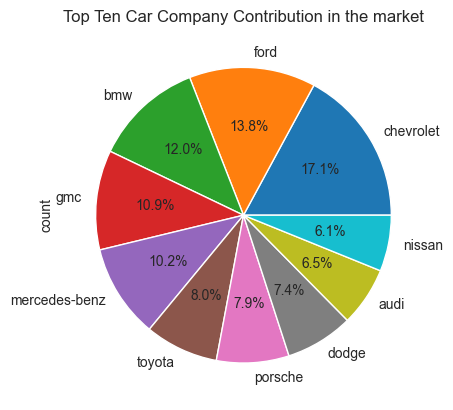

In [20]:
df_lw['MAKE'].value_counts().head(10).plot(kind='pie',autopct="%0.1f%%").set_title('Top Ten Car Company Contribution in the market')
#Top Ten Car Company Contribution in the market

Text(0.5, 1.0, 'Top Ten Car Model')

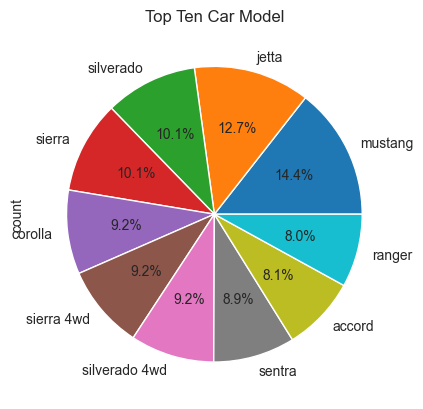

In [21]:
df_lw['MODEL'].value_counts().head(10).plot(kind='pie',autopct="%0.1f%%").set_title('Top Ten Car Model')
#Top Ten Car Model

Text(0.5, 1.0, 'Top 10 Most used Vechicle Class')

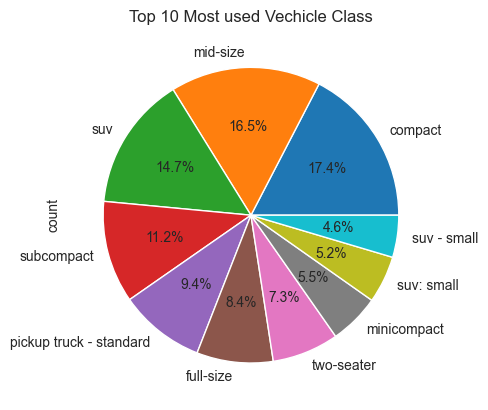

In [22]:
df_lw['VEHICLE CLASS'].value_counts().head(10).plot(kind="pie",autopct="%0.1f%%").set_title("Top 10 Most used Vechicle Class")

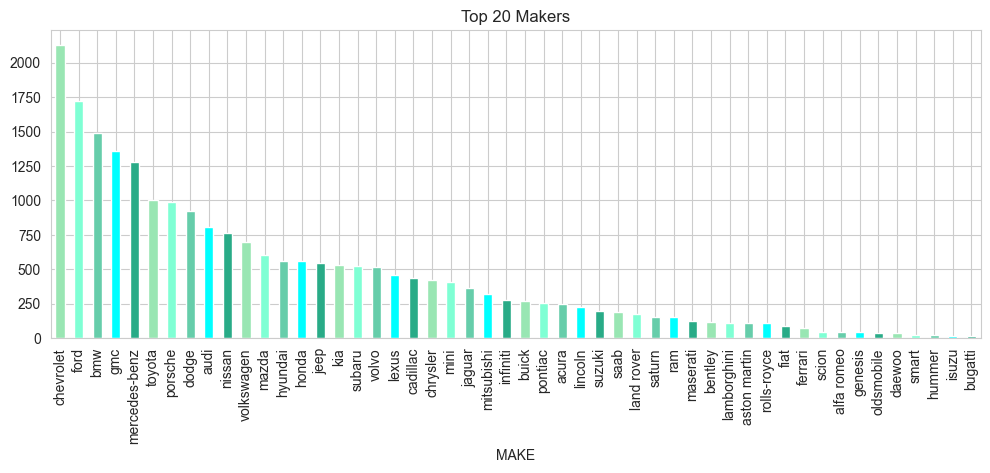

In [23]:
plt.figure(figsize=(12,4))
plt.title('Top 20 Makers')
df_lw['MAKE'].value_counts()[:50].plot(kind='bar',color=custom_palette)
plt.show()

In [24]:
makegrp2=pd.DataFrame(df_lw.groupby(['MAKE','VEHICLE CLASS']).count().reset_index())
makegrp2

MAKE   VEHICLE CLASS  YEAR  MODEL  ENGINE SIZE  CYLINDERS  TRANSMISSION  \
0    acura         compact   102    102          102        102           102   
1    acura        mid-size    55     55           55         55            55   
2    acura      subcompact    25     25           25         25            25   
3    acura             suv    20     20           20         20            20   
4    acura     suv - small    14     14           14         14            14   
..     ...             ...   ...    ...          ...        ...           ...   
434  volvo             suv    55     55           55         55            55   
435  volvo     suv - small    30     30           30         30            30   
436  volvo  suv - standard     8      8            8          8             8   
437  volvo      suv: small    18     18           18         18            18   
438  volvo   suv: standard    10     10           10         10            10   

     FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0     102               102             102              102         102   
1      55                55              55               55          55   
2      25                25              25               25          25   
3      20                20              20               20          20   
4      14                14              14               14          14   
..    ...               ...             ...              ...         ...   
434    55                55              55               55          55   
435    30                30              30               30          30   
436     8                 8               8                8           8   
437    18                18              18               18          18   
438    10                10              10               10          10   

     EMISSIONS  
0          102  
1           55  
2           25  
3           20  
4           14  
..         ...  
434         55  
435         30  
436          8  
437         18  
438         10  

[439 rows x 13 columns]

In [182]:
makegrp=pd.DataFrame(df_lw.groupby('MAKE').mean(numeric_only=True))

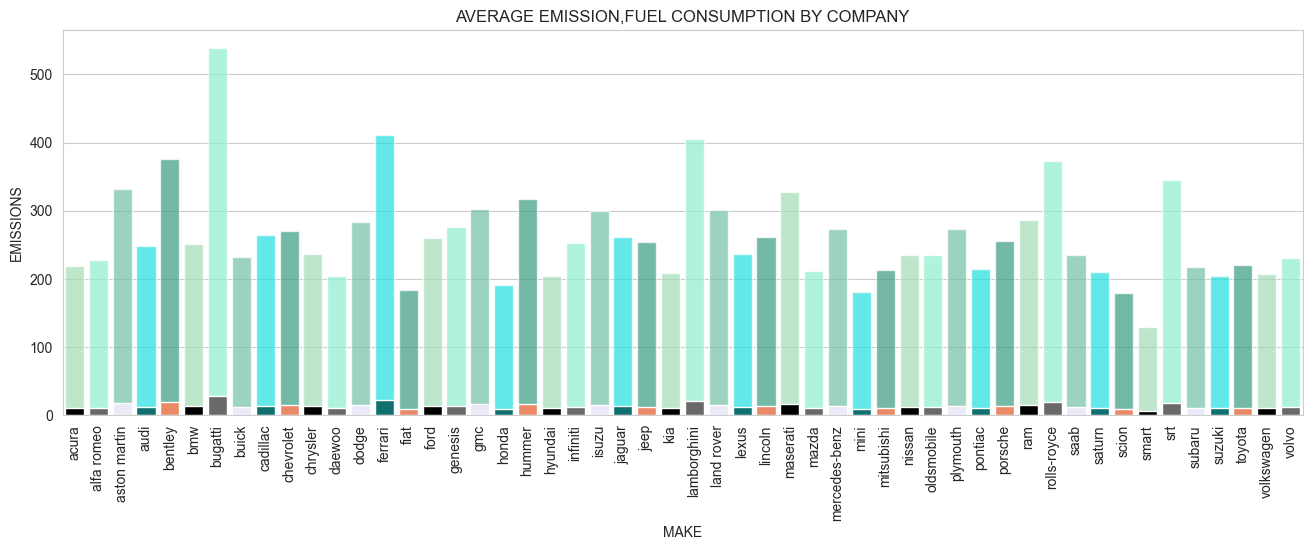

In [183]:
plt.figure(figsize=(16,5))
plt.title('AVERAGE EMISSION,FUEL CONSUMPTION BY COMPANY')
sns.barplot(x=makegrp.index,y='EMISSIONS',data=makegrp,palette=custom_palette,alpha=0.7)
sns.barplot(x=makegrp.index,y='FUEL CONSUMPTION',data=makegrp,palette=palette1)
plt.tick_params(axis='x',labelrotation=90)

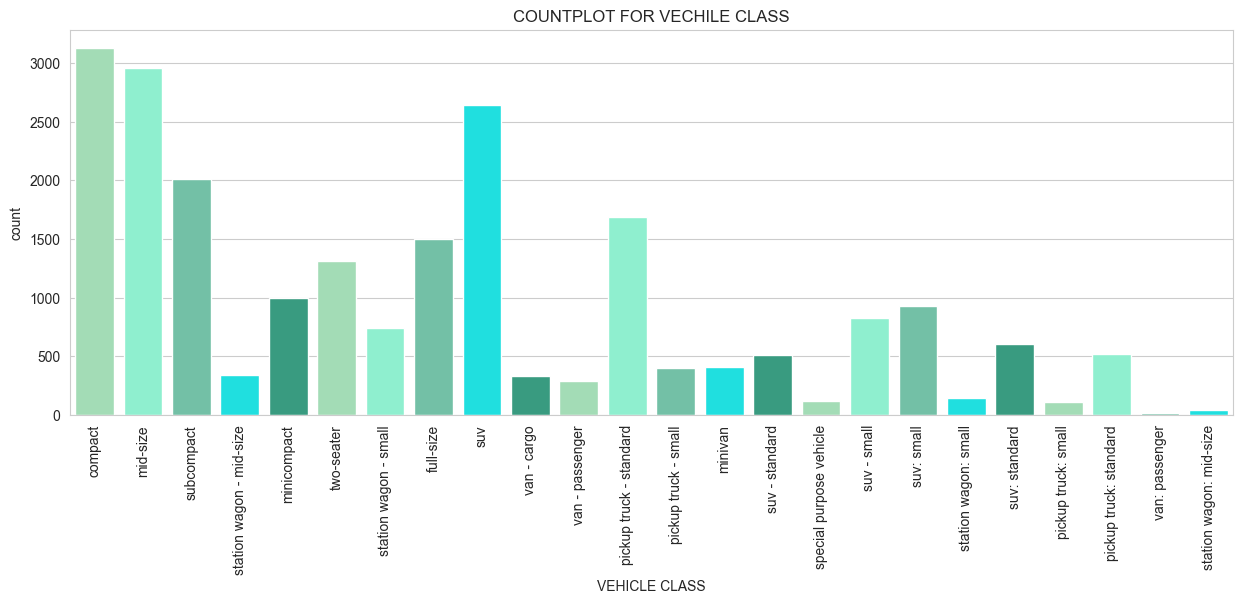

In [25]:
plt.figure(figsize=(15,5))
plt.title('COUNTPLOT FOR VECHILE CLASS')
sns.countplot(x='VEHICLE CLASS',data=df_lw,palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)
plt.show()

In [185]:
vechclssgrp=pd.DataFrame(df_lw.groupby('VEHICLE CLASS').mean(numeric_only=True))

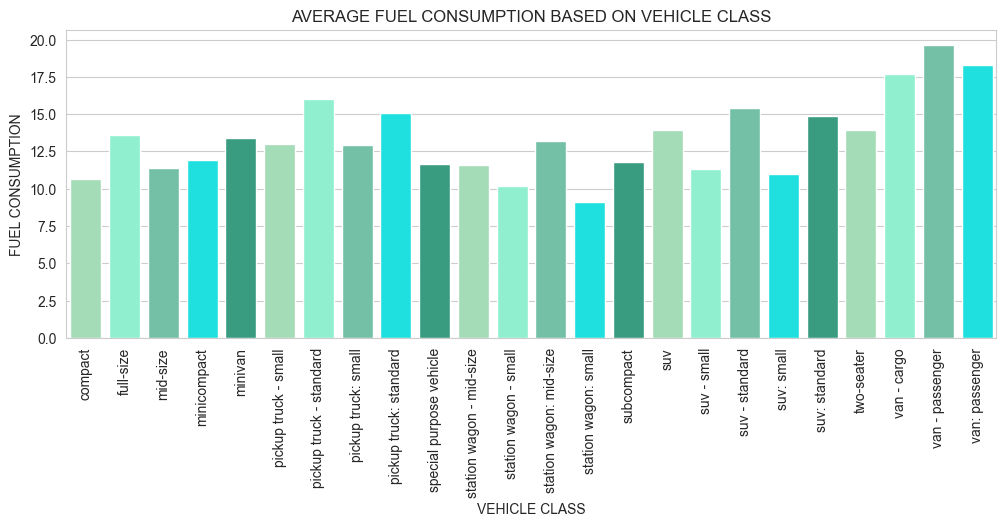

In [186]:
plt.figure(figsize=(12,4))
plt.title('AVERAGE FUEL CONSUMPTION BASED ON VEHICLE CLASS')
sns.barplot(x=vechclssgrp.index,y='FUEL CONSUMPTION',data=vechclssgrp,palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)
plt.show()

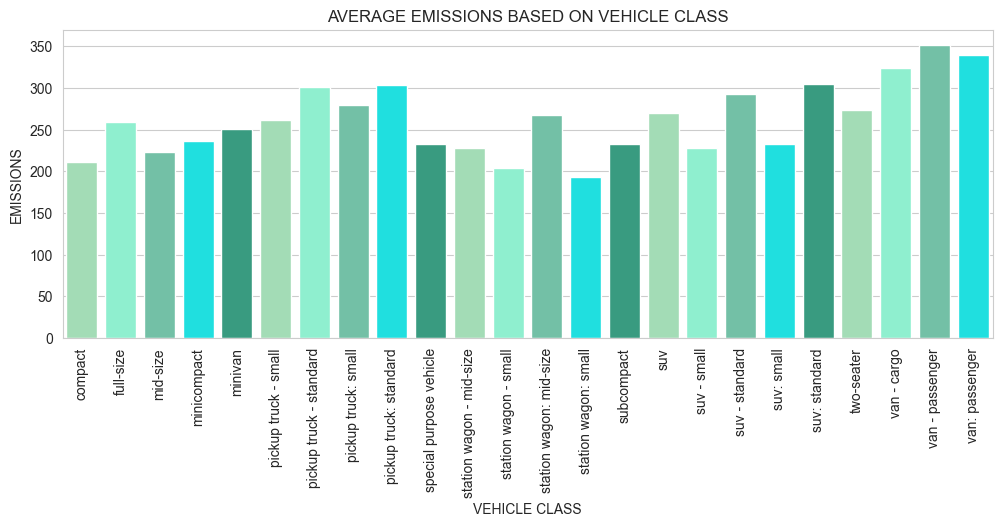

In [187]:
plt.figure(figsize=(12,4))
plt.title('AVERAGE EMISSIONS BASED ON VEHICLE CLASS')
sns.barplot(x=vechclssgrp.index,y='EMISSIONS',data=vechclssgrp,palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)
plt.show()

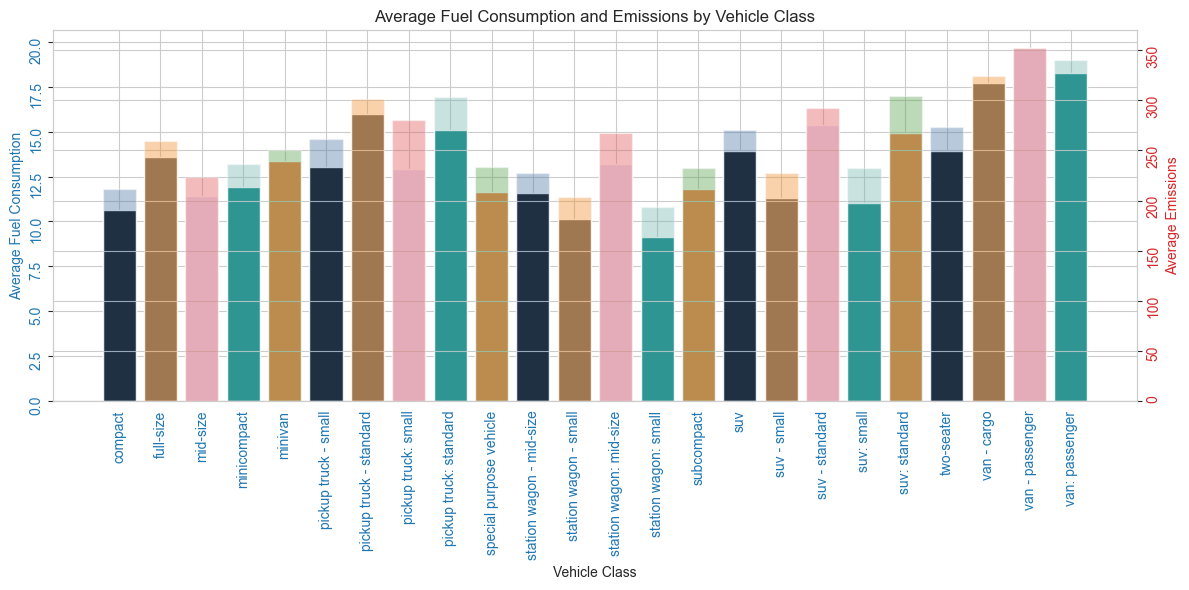

In [188]:
fig,ax1=plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Vehicle Class')
ax1.set_ylabel('Average Fuel Consumption', color=color)
ax1.bar(vechclssgrp.index,vechclssgrp['FUEL CONSUMPTION'], color=palette1, alpha=1, label='Fuel Consumption')
ax1.tick_params(axis='y', labelcolor=color,labelrotation=90)
ax1.tick_params(axis='x', labelcolor=color,labelrotation=90)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Emissions', color=color)
ax2.bar(vechclssgrp.index, vechclssgrp['EMISSIONS'], color=palette2, alpha=0.4, label='Emissions')
ax2.tick_params(axis='y', labelcolor=color,labelrotation=90)
plt.title('Average Fuel Consumption and Emissions by Vehicle Class')
fig.tight_layout()
plt.show()
### This code creates a dual-axis bar chart using matplotlib to compare average fuel consumption and emissions across different vehicle classes.

<Axes: xlabel='FUEL CONSUMPTION', ylabel='EMISSIONS'>

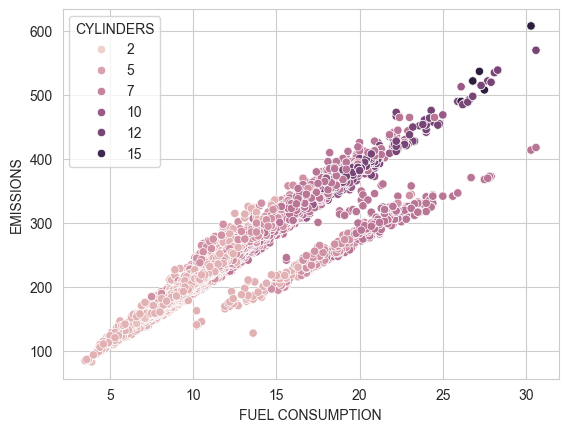

In [26]:
sns.scatterplot(data=df_lw,x='FUEL CONSUMPTION',y='EMISSIONS',hue='CYLINDERS')
# there is a positive correlation between emission and fuel consumption

<Axes: xlabel='ENGINE SIZE', ylabel='FUEL CONSUMPTION'>

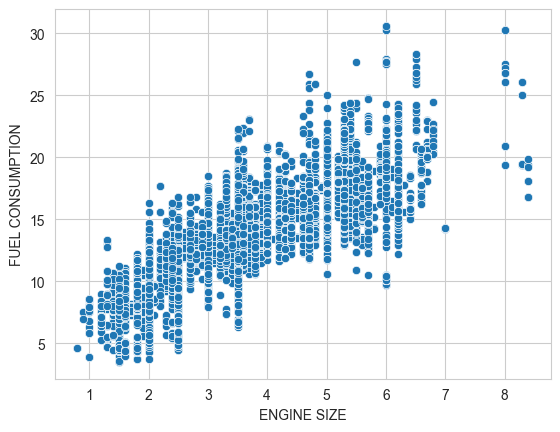

In [27]:
sns.scatterplot(data=df_lw,x='ENGINE SIZE',y='FUEL CONSUMPTION')
#as engine size increases fuel consumption also increases

<Axes: xlabel='ENGINE SIZE', ylabel='FUEL CONSUMPTION'>

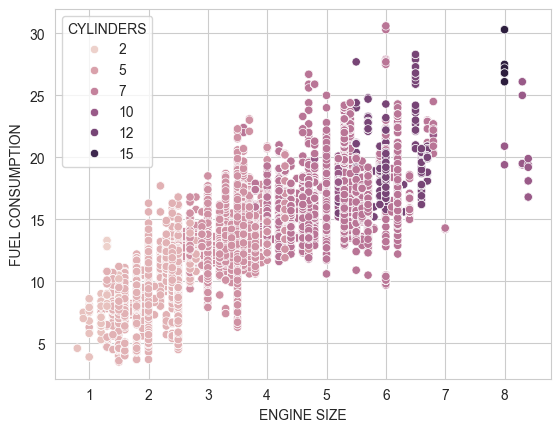

In [28]:
sns.scatterplot(data=df_lw,x='ENGINE SIZE',y='FUEL CONSUMPTION',hue='CYLINDERS')
# there is a positive correlation between engine size,cylinder,and fuel consumption

<Axes: title={'center': 'Make,vehicle class-count'}, xlabel='MAKE', ylabel='VEHICLE CLASS'>

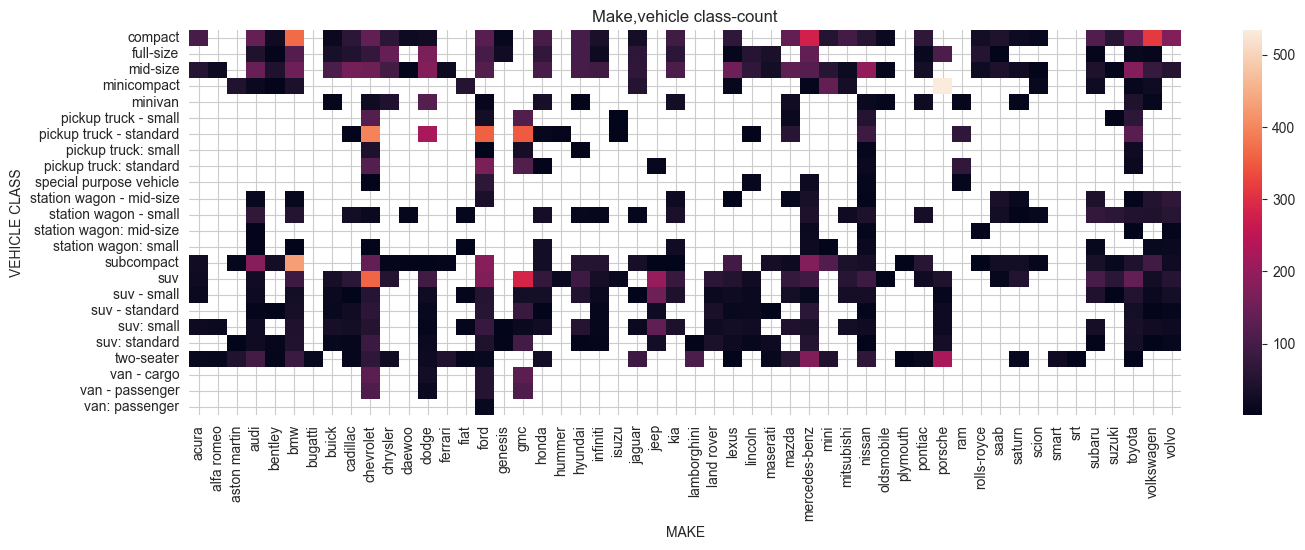

In [29]:
plt.figure(figsize=(16,5))
plt.title('Make,vehicle class-count')
sns.heatmap(makegrp2.pivot_table(columns='MAKE',index='VEHICLE CLASS',values="MODEL"))

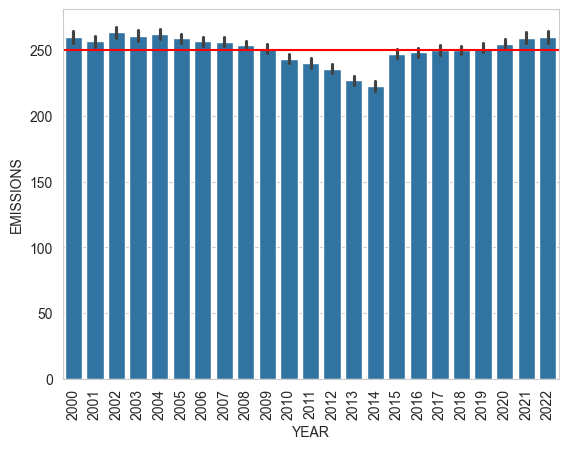

In [30]:
graph=sns.barplot(data=df_lw,x='YEAR',y='EMISSIONS')
plt.xticks(rotation='vertical')
# 2022 co2 emssion is more than 250
# from 2000 to 2022 emssion rate has always been greater than 200
graph.axhline(y=df_lw['EMISSIONS'].mean(),color='red')
# mean emission for all the years from 2000 o 2022 is upto 250
# from 2002 to 2014 there has been a deceares in the emission 
# from 2015 it suddently increased above 250 again

([0, 1, 2, 3],
 [Text(0, 0, 'z'), Text(1, 0, 'x'), Text(2, 0, 'd'), Text(3, 0, 'e')])

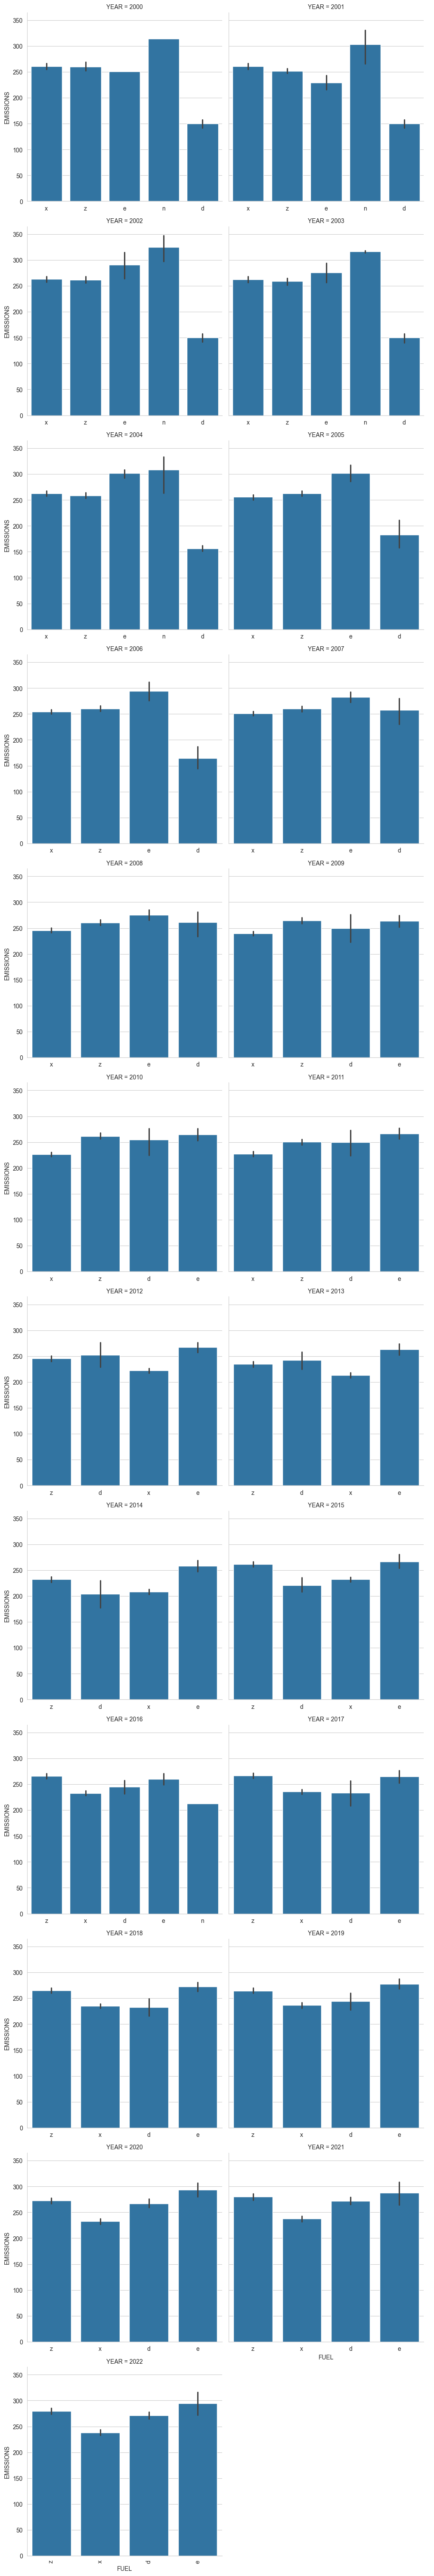

In [31]:
sns.catplot(data=df_lw,x='FUEL',y='EMISSIONS',kind='bar',col='YEAR',col_wrap=2,sharex=False)
plt.xticks(rotation='vertical')

In [32]:
df_lw.select_dtypes(include=['int64','float64']).corr()

YEAR  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  \
YEAR              1.000000    -0.077749  -0.072518         -0.098528   
ENGINE SIZE      -0.077749     1.000000   0.913385          0.821615   
CYLINDERS        -0.072518     0.913385   1.000000          0.794928   
FUEL CONSUMPTION -0.098528     0.821615   0.794928          1.000000   
HWY (L/100 km)   -0.007337     0.749409   0.698321          0.942347   
COMB (L/100 km)  -0.067906     0.807329   0.771571          0.992959   
COMB (mpg)        0.079895    -0.755006  -0.714196         -0.921355   
EMISSIONS        -0.047733     0.821308   0.802164          0.919094   

                  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  EMISSIONS  
YEAR                   -0.007337        -0.067906    0.079895  -0.047733  
ENGINE SIZE             0.749409         0.807329   -0.755006   0.821308  
CYLINDERS               0.698321         0.771571   -0.714196   0.802164  
FUEL CONSUMPTION        0.942347         0.992959   -0.921355   0.919094  
HWY (L/100 km)          1.000000         0.975012   -0.884736   0.894767  
COMB (L/100 km)         0.975012         1.000000   -0.920909   0.922975  
COMB (mpg)             -0.884736        -0.920909    1.000000  -0.901839  
EMISSIONS               0.894767         0.922975   -0.901839   1.000000

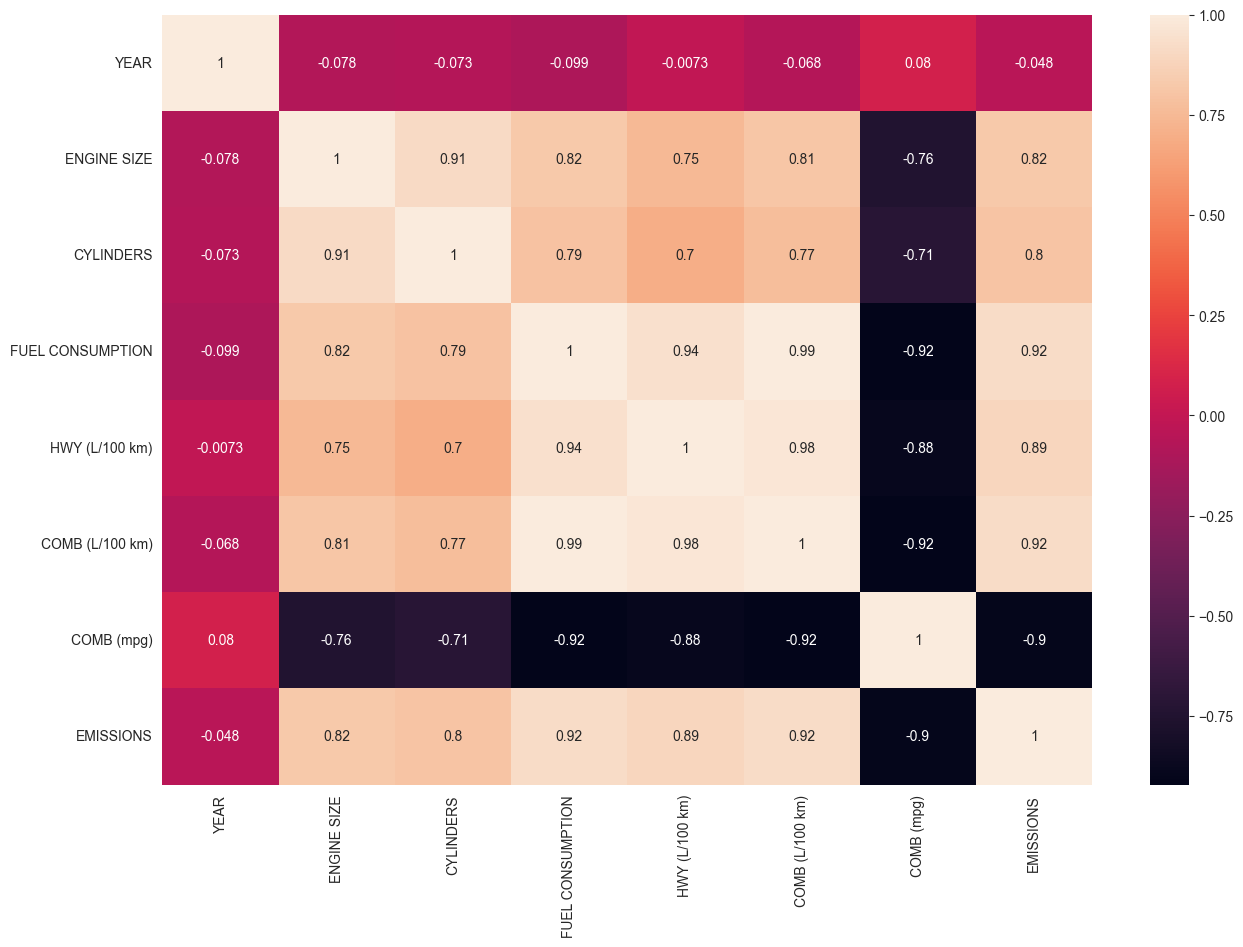

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df_lw.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.show()

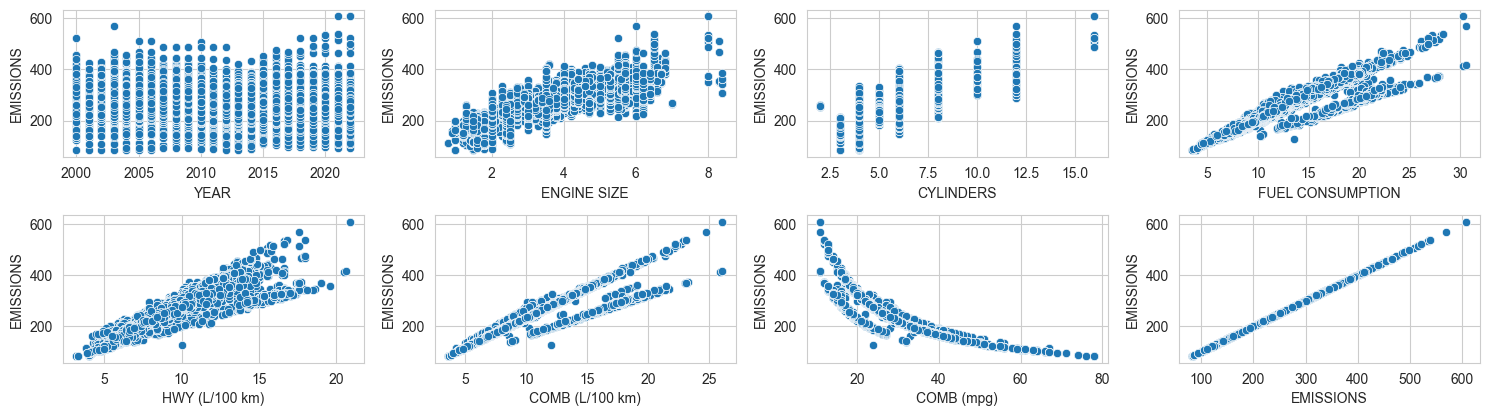

In [34]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df_lw,x=col,y='EMISSIONS')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [35]:
df_lw.drop('YEAR',axis=1,inplace=True)
# feature YEAR as droped

In [36]:
df_lw.select_dtypes(include=['int64','float64']).corr()

ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
ENGINE SIZE          1.000000   0.913385          0.821615        0.749409   
CYLINDERS            0.913385   1.000000          0.794928        0.698321   
FUEL CONSUMPTION     0.821615   0.794928          1.000000        0.942347   
HWY (L/100 km)       0.749409   0.698321          0.942347        1.000000   
COMB (L/100 km)      0.807329   0.771571          0.992959        0.975012   
COMB (mpg)          -0.755006  -0.714196         -0.921355       -0.884736   
EMISSIONS            0.821308   0.802164          0.919094        0.894767   

                  COMB (L/100 km)  COMB (mpg)  EMISSIONS  
ENGINE SIZE              0.807329   -0.755006   0.821308  
CYLINDERS                0.771571   -0.714196   0.802164  
FUEL CONSUMPTION         0.992959   -0.921355   0.919094  
HWY (L/100 km)           0.975012   -0.884736   0.894767  
COMB (L/100 km)          1.000000   -0.920909   0.922975  
COMB (mpg)              -0.920909    1.000000  -0.901839  
EMISSIONS                0.922975   -0.901839   1.000000

## Checking outliers

In [37]:
df_lw["EMISSIONS"].mean() 

250.06384393704278

In [38]:
df_lw["EMISSIONS"].median()

243.0

##### there is only a slight change in the mean and median

<Axes: xlabel='EMISSIONS', ylabel='Count'>

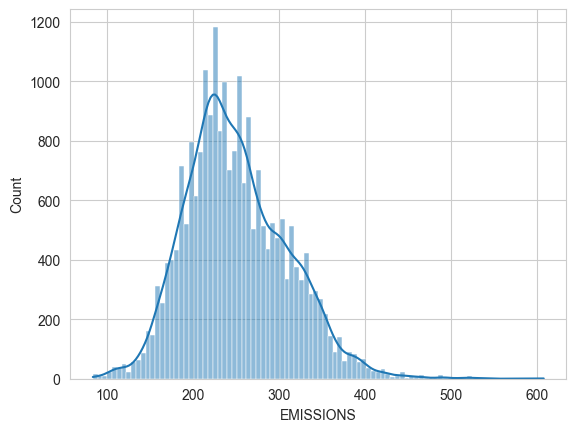

In [39]:
sns.histplot(data=df_lw,x=df_lw.EMISSIONS,kde=True)
# the histplot is showing there is right skew in the graph

#### Checking Skewness and kurtosis

In [40]:
df_lw.select_dtypes(include=['int64','float64']).skew() #skewness of numerical columns are moderatly skewed (0.5-1.0)

ENGINE SIZE         0.631319
CYLINDERS           0.911443
FUEL CONSUMPTION    0.760971
HWY (L/100 km)      0.936788
COMB (L/100 km)     0.817219
COMB (mpg)          1.172822
EMISSIONS           0.534733
dtype: float64

In [41]:
kurtosis(df_lw.select_dtypes(include=['int64','float64']),fisher=False) # here the  k is greater than 3 therefor it leptokurtic

array([2.60486441, 4.19838881, 4.10466635, 4.14964167, 4.05476434,
       6.6428208 , 3.61559988])

### Checking outliers in each numerical features using Boxplot

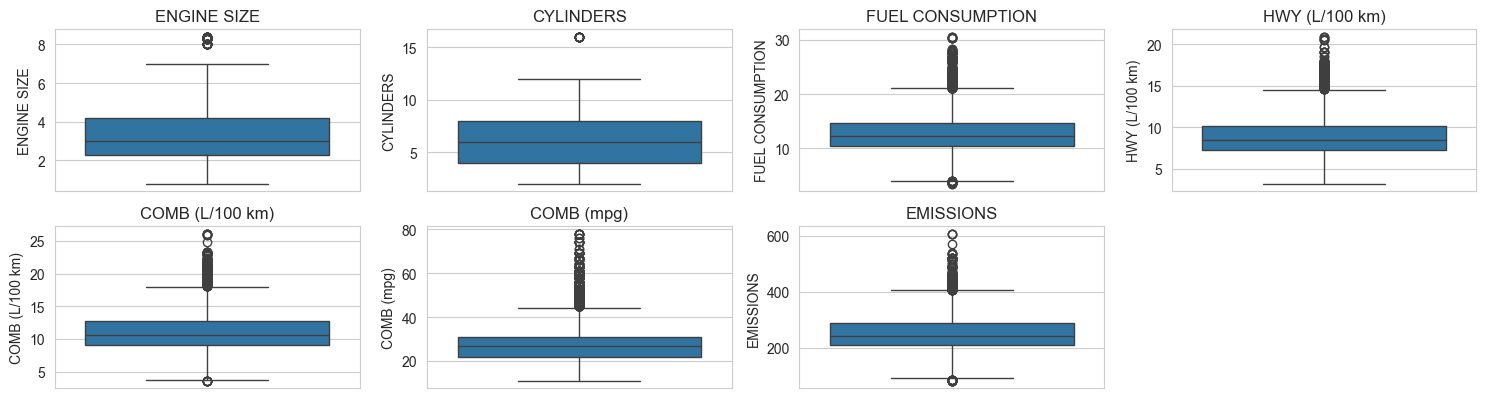

In [42]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df_lw.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df_lw[col])
    plt.title(col)
plt.tight_layout()
plt.show()
# there are outiers according to boxplot

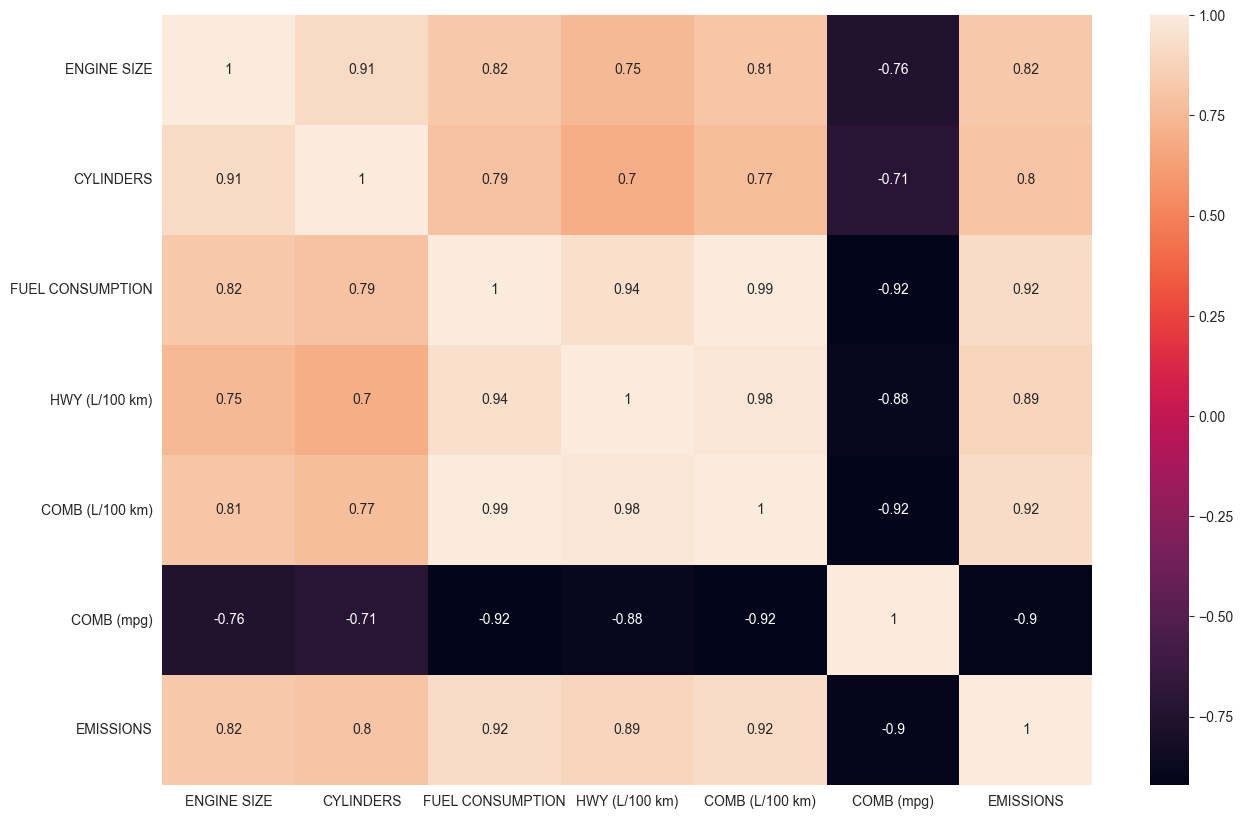

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df_lw.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.show()

## Remove outliers

#### Removing outliers useing IQR method

In [44]:
q1=df_lw.select_dtypes(include=['int64','float64']).quantile(0.25)
q3 = df_lw.select_dtypes(include=['int64','float64']).quantile(0.75)
iqr = q3-q1
lw=q1-1.5*iqr
uw=q3+1.5*iqr
outliers =((df_lw.select_dtypes(include=['int64','float64']) <lw) | (df_lw.select_dtypes(include=['int64','float64']) >uw)).any(axis=1)
no_out=df_lw[~outliers]


In [45]:
no_out
# dataset after removing the outliers using IQR

MAKE        MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0      acura        1.6el        compact          1.6          4           a4   
1      acura        1.6el        compact          1.6          4           m5   
2      acura        3.2tl       mid-size          3.2          6          as5   
3      acura        3.5rl       mid-size          3.5          6           a4   
4      acura      integra     subcompact          1.8          4           a4   
...      ...          ...            ...          ...        ...          ...   
22551  volvo  xc40 t5 awd     suv: small          2.0          4          as8   
22552  volvo  xc60 b5 awd     suv: small          2.0          4          as8   
22553  volvo  xc60 b6 awd     suv: small          2.0          4          as8   
22554  volvo  xc90 t5 awd  suv: standard          2.0          4          as8   
22555  volvo  xc90 t6 awd  suv: standard          2.0          4          as8   

      FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0        x               9.2             6.7              8.1          35   
1        x               8.5             6.5              7.6          37   
2        z              12.2             7.4             10.0          28   
3        z              13.4             9.2             11.5          25   
4        x              10.0             7.0              8.6          33   
...    ...               ...             ...              ...         ...   
22551    z              10.7             7.7              9.4          30   
22552    z              10.5             8.1              9.4          30   
22553    z              11.0             8.7              9.9          29   
22554    z              11.5             8.4             10.1          28   
22555    z              12.4             8.9             10.8          26   

       EMISSIONS  
0            186  
1            175  
2            230  
3            264  
4            198  
...          ...  
22551        219  
22552        219  
22553        232  
22554        236  
22555        252  

[21376 rows x 12 columns]

In [128]:
no_out.isnull().sum()# No null values

MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [132]:
no_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21376 entries, 0 to 22555
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MAKE              21376 non-null  object 
 1   MODEL             21376 non-null  object 
 2   VEHICLE CLASS     21376 non-null  object 
 3   ENGINE SIZE       21376 non-null  float64
 4   CYLINDERS         21376 non-null  float64
 5   TRANSMISSION      21376 non-null  object 
 6   FUEL              21376 non-null  object 
 7   FUEL CONSUMPTION  21376 non-null  float64
 8   HWY (L/100 km)    21376 non-null  float64
 9   COMB (L/100 km)   21376 non-null  float64
 10  COMB (mpg)        21376 non-null  float64
 11  EMISSIONS         21376 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.1+ MB


#### 1179 outliers has been removed, Remaining is 21376 row and 12 columns

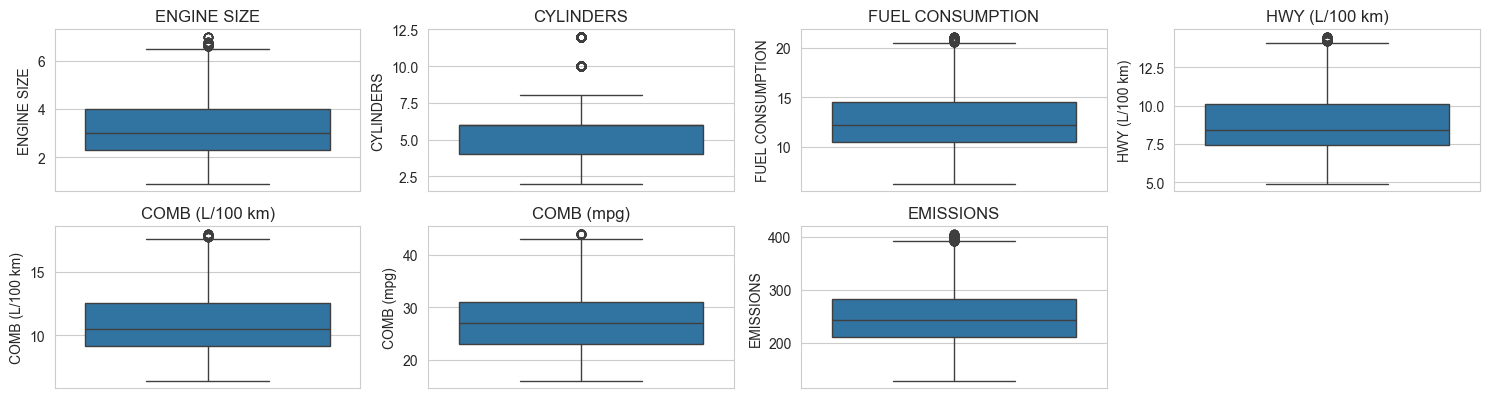

In [46]:
plt.figure(figsize=(15,10))
for i, col in enumerate(no_out.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=no_out[col])
    plt.title(col)
plt.tight_layout()
plt.show()
# there are outiers but most of the outliers are removed 

#### Remaining outliers are replaced using below method capping

In [47]:
feat_col=no_out.select_dtypes(include=['int64','float64']).columns.values
feat_col

array(['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'], dtype=object)

In [48]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw 

In [49]:
for i in feat_col:
    lw,uw=whisker(no_out[i])
    no_out[i]=np.where(no_out[i]<lw,lw,no_out[i])
    no_out[i]=np.where(no_out[i]>uw,uw,no_out[i])
#Replaceing the outliers with lowers_whisker =lw and upper_whisker=uw

In [50]:
no_out.shape

(21376, 12)

## Visualization After outliers removed

#### Boxplot after outliers are removed

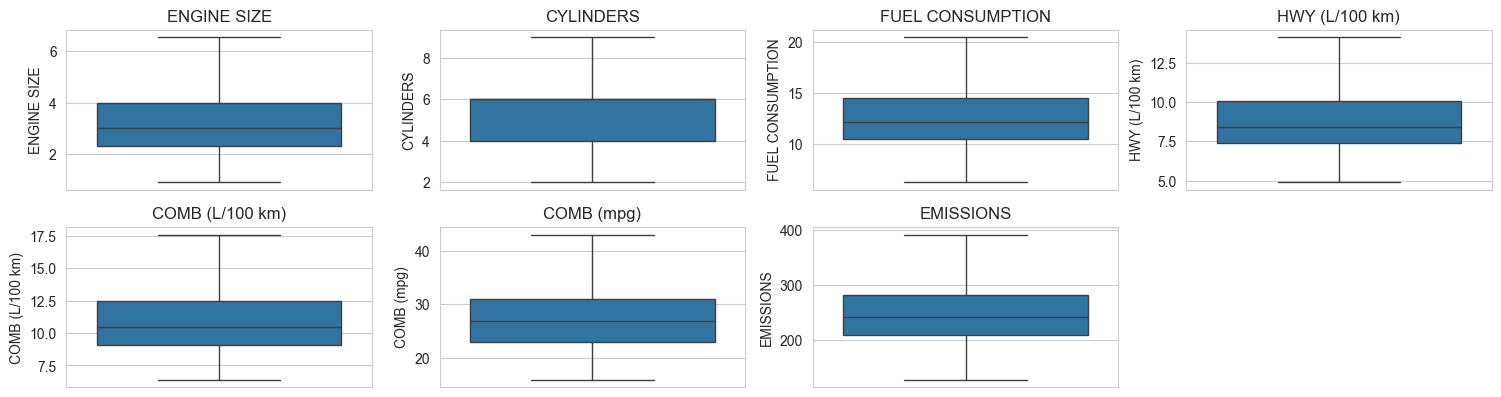

In [51]:
plt.figure(figsize=(15,10))
for i, col in enumerate(no_out.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=no_out[col])
    plt.title(col)
plt.tight_layout()
plt.show()
#  the outliers are replaced by lower_whisker and upper_whisker

#### Histplot after outliers are removed

<Axes: xlabel='EMISSIONS', ylabel='Count'>

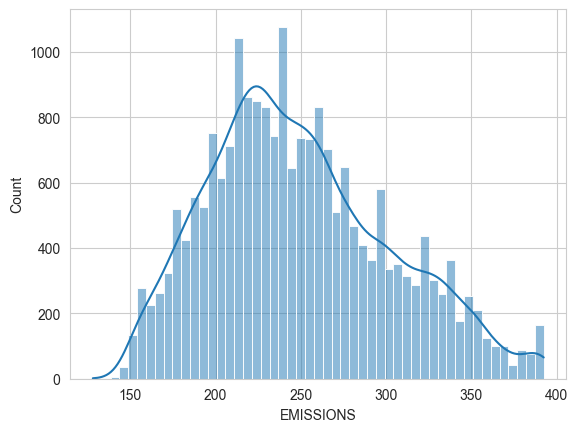

In [52]:
sns.histplot(data=no_out,x=no_out.EMISSIONS,kde=True)
# histplot after outliers are removed

In [53]:
kurtosis(no_out.select_dtypes(include=['int64','float64']),fisher=False) # here the  k is lesser than 3 therefor it platykurtic

array([2.48943441, 1.87614251, 2.72899422, 2.6804963 , 2.6563635 ,
       2.67933326, 2.63979837])

In [54]:
no_out.select_dtypes(include=['int64','float64']).skew()

ENGINE SIZE         0.608142
CYLINDERS           0.298164
FUEL CONSUMPTION    0.482644
HWY (L/100 km)      0.587931
COMB (L/100 km)     0.514026
COMB (mpg)          0.409757
EMISSIONS           0.467039
dtype: float64

#### scatterplot after outliers are removed

<Axes: xlabel='FUEL CONSUMPTION', ylabel='EMISSIONS'>

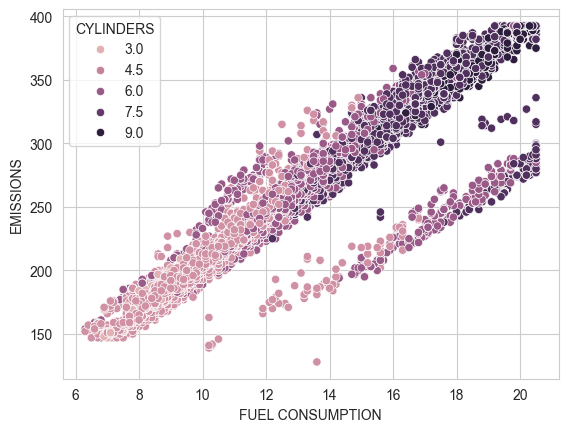

In [55]:
sns.scatterplot(data=no_out,x='FUEL CONSUMPTION',y='EMISSIONS',hue='CYLINDERS')
# there is a positive correlation between emission and fuel consumption

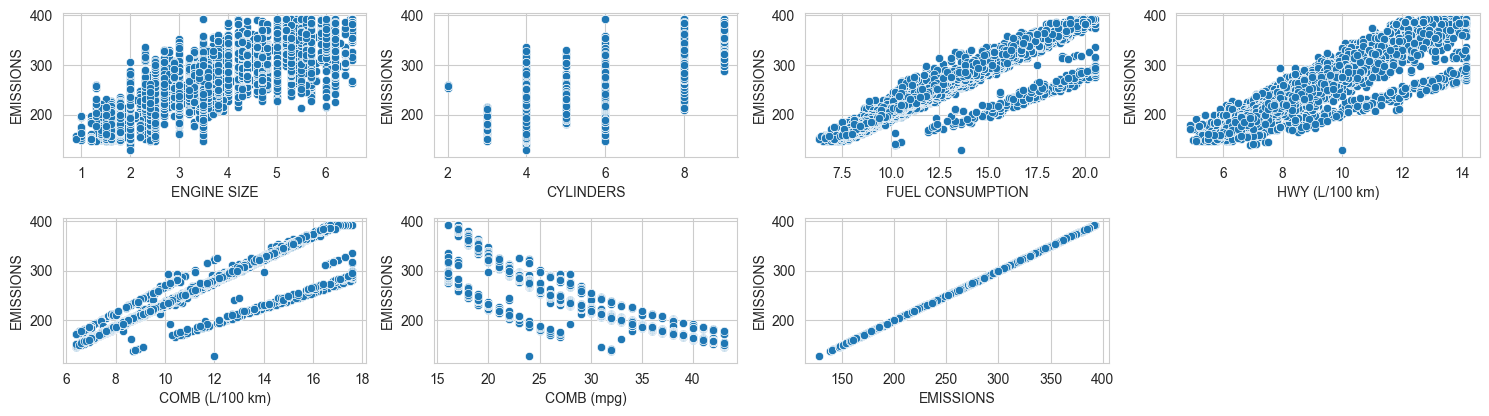

In [56]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(no_out.select_dtypes(include=['int64','float64']).columns):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=no_out,x=col,y='EMISSIONS')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [57]:
no_out.nlargest(10,'EMISSIONS')

MAKE                MODEL            VEHICLE CLASS  ENGINE SIZE  \
177     dodge           dakota 4x4  pickup truck - standard         5.90   
179     dodge          durango 4x4                      suv         5.90   
180     dodge  durango 5.9 r/t 4x4                      suv         5.90   
205     dodge       ram 2500 wagon          van - passenger         5.20   
958       gmc      k1500 yukon 4x4                      suv         6.00   
960       gmc   k1500 yukon xl 4x4                      suv         6.00   
1050  lincoln        navigator 4x4                      suv         5.40   
1355  bentley          azure turbo               subcompact         6.55   
1557    dodge         ram 1500 van              van - cargo         5.20   
1560    dodge       ram 1500 wagon          van - passenger         5.20   

      CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  HWY (L/100 km)  \
177         8.0           a4    x              20.3           13.40   
179         8.0           a4    x              20.3           13.40   
180         8.0           a4    z              20.3           13.40   
205         8.0           a4    x              19.8           14.00   
958         8.0           a4    x              20.4           14.00   
960         8.0           a4    x              20.4           14.00   
1050        8.0           a4    z              20.4           13.70   
1355        8.0           a4    z              20.5           13.60   
1557        8.0           a4    x              19.3           14.15   
1560        8.0           a4    x              19.4           14.15   

      COMB (L/100 km)  COMB (mpg)  EMISSIONS  
177              17.2        16.0      392.5  
179              17.2        16.0      392.5  
180              17.2        16.0      392.5  
205              17.2        16.0      392.5  
958              17.5        16.0      392.5  
960              17.5        16.0      392.5  
1050             17.4        16.0      392.5  
1355             17.5        16.0      392.5  
1557             17.1        17.0      392.5  
1560             17.2        16.0      392.5

In [ ]:
### checking the correlation of featues with target feature

In [58]:
corr1=no_out.select_dtypes(include=['int64','float64']).corrwith(no_out['EMISSIONS'])

<Axes: >

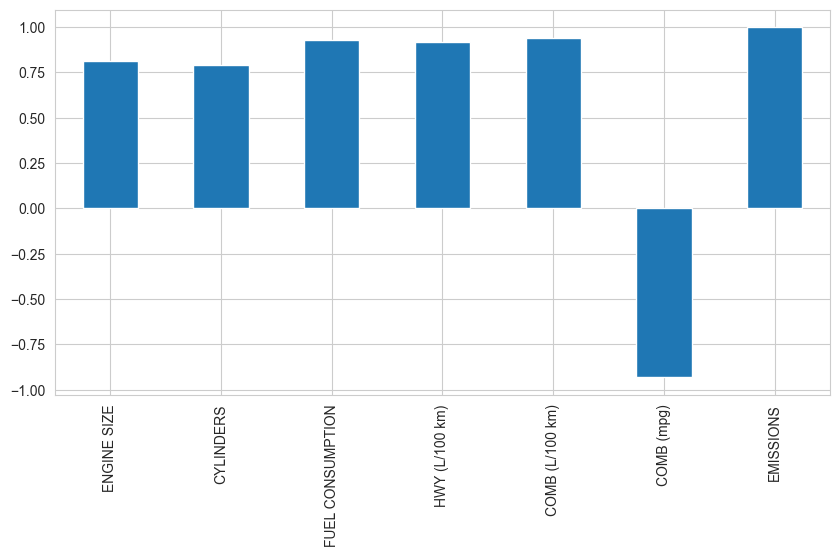

In [59]:
plt.figure(figsize=(10,5))
corr1.plot(kind='bar')

In [ ]:
### checking mean and median after outlier removel

In [61]:
no_out["EMISSIONS"].mean() 

249.31371631736528

In [62]:
no_out["EMISSIONS"].median() 

242.0

In [63]:
no_out.describe().T

count        mean        std    min    25%    50%    75%  \
ENGINE SIZE       21376.0    3.320006   1.273203    0.9    2.3    3.0    4.0   
CYLINDERS         21376.0    5.751450   1.588886    2.0    4.0    6.0    6.0   
FUEL CONSUMPTION  21376.0   12.612313   2.922382    6.3   10.5   12.2   14.5   
HWY (L/100 km)    21376.0    8.802260   1.918073    4.9    7.4    8.4   10.1   
COMB (L/100 km)   21376.0   10.899397   2.432030    6.4    9.1   10.5   12.5   
COMB (mpg)        21376.0   27.189792   5.994684   16.0   23.0   27.0   31.0   
EMISSIONS         21376.0  249.313716  53.257955  128.0  210.0  242.0  283.0   

                     max  
ENGINE SIZE         6.55  
CYLINDERS           9.00  
FUEL CONSUMPTION   20.50  
HWY (L/100 km)     14.15  
COMB (L/100 km)    17.60  
COMB (mpg)         43.00  
EMISSIONS         392.50

In [168]:
no_out

MAKE        MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0      acura        1.6el        compact          1.6        4.0           a4   
1      acura        1.6el        compact          1.6        4.0           m5   
2      acura        3.2tl       mid-size          3.2        6.0          as5   
3      acura        3.5rl       mid-size          3.5        6.0           a4   
4      acura      integra     subcompact          1.8        4.0           a4   
...      ...          ...            ...          ...        ...          ...   
22551  volvo  xc40 t5 awd     suv: small          2.0        4.0          as8   
22552  volvo  xc60 b5 awd     suv: small          2.0        4.0          as8   
22553  volvo  xc60 b6 awd     suv: small          2.0        4.0          as8   
22554  volvo  xc90 t5 awd  suv: standard          2.0        4.0          as8   
22555  volvo  xc90 t6 awd  suv: standard          2.0        4.0          as8   

      FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0        x               9.2             6.7              8.1        35.0   
1        x               8.5             6.5              7.6        37.0   
2        z              12.2             7.4             10.0        28.0   
3        z              13.4             9.2             11.5        25.0   
4        x              10.0             7.0              8.6        33.0   
...    ...               ...             ...              ...         ...   
22551    z              10.7             7.7              9.4        30.0   
22552    z              10.5             8.1              9.4        30.0   
22553    z              11.0             8.7              9.9        29.0   
22554    z              11.5             8.4             10.1        28.0   
22555    z              12.4             8.9             10.8        26.0   

       EMISSIONS  
0          186.0  
1          175.0  
2          230.0  
3          264.0  
4          198.0  
...          ...  
22551      219.0  
22552      219.0  
22553      232.0  
22554      236.0  
22555      252.0  

[21376 rows x 12 columns]

## Feature Engineering

## Encoding categorical values using One Hot Encoding

In [64]:
no_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21376 entries, 0 to 22555
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MAKE              21376 non-null  object 
 1   MODEL             21376 non-null  object 
 2   VEHICLE CLASS     21376 non-null  object 
 3   ENGINE SIZE       21376 non-null  float64
 4   CYLINDERS         21376 non-null  float64
 5   TRANSMISSION      21376 non-null  object 
 6   FUEL              21376 non-null  object 
 7   FUEL CONSUMPTION  21376 non-null  float64
 8   HWY (L/100 km)    21376 non-null  float64
 9   COMB (L/100 km)   21376 non-null  float64
 10  COMB (mpg)        21376 non-null  float64
 11  EMISSIONS         21376 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.1+ MB


In [65]:
df_encoded = pd.get_dummies(no_out, columns=['MAKE','MODEL','VEHICLE CLASS','TRANSMISSION','FUEL'],dtype=int)
## encoding categorical feaures using get_dummies

In [66]:
df_encoded

ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
0              1.6        4.0               9.2             6.7   
1              1.6        4.0               8.5             6.5   
2              3.2        6.0              12.2             7.4   
3              3.5        6.0              13.4             9.2   
4              1.8        4.0              10.0             7.0   
...            ...        ...               ...             ...   
22551          2.0        4.0              10.7             7.7   
22552          2.0        4.0              10.5             8.1   
22553          2.0        4.0              11.0             8.7   
22554          2.0        4.0              11.5             8.4   
22555          2.0        4.0              12.4             8.9   

       COMB (L/100 km)  COMB (mpg)  EMISSIONS  MAKE_acura  MAKE_alfa romeo  \
0                  8.1        35.0      186.0           1                0   
1                  7.6        37.0      175.0           1                0   
2                 10.0        28.0      230.0           1                0   
3                 11.5        25.0      264.0           1                0   
4                  8.6        33.0      198.0           1                0   
...                ...         ...        ...         ...              ...   
22551              9.4        30.0      219.0           0                0   
22552              9.4        30.0      219.0           0                0   
22553              9.9        29.0      232.0           0                0   
22554             10.1        28.0      236.0           0                0   
22555             10.8        26.0      252.0           0                0   

       MAKE_aston martin  ...  TRANSMISSION_av8  TRANSMISSION_m4  \
0                      0  ...                 0                0   
1                      0  ...                 0                0   
2                      0  ...                 0                0   
3                      0  ...                 0                0   
4                      0  ...                 0                0   
...                  ...  ...               ...              ...   
22551                  0  ...                 0                0   
22552                  0  ...                 0                0   
22553                  0  ...                 0                0   
22554                  0  ...                 0                0   
22555                  0  ...                 0                0   

       TRANSMISSION_m5  TRANSMISSION_m6  TRANSMISSION_m7  FUEL_d  FUEL_e  \
0                    0                0                0       0       0   
1                    1                0                0       0       0   
2                    0                0                0       0       0   
3                    0                0                0       0       0   
4                    0                0                0       0       0   
...                ...              ...              ...     ...     ...   
22551                0                0                0       0       0   
22552                0                0                0       0       0   
22553                0                0                0       0       0   
22554                0                0                0       0       0   
22555                0                0                0       0       0   

       FUEL_n  FUEL_x  FUEL_z  
0           0       1       0  
1           0       1       0  
2           0       0       1  
3           0       0       1  
4           0       1       0  
...       ...     ...     ...  
22551       0       0       1  
22552       0       0       1  
22553       0       0       1  
22554       0       0       1  
22555       0       0       1  

[21376 rows x 3706 columns]

In [67]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21376 entries, 0 to 22555
Columns: 3706 entries, ENGINE SIZE to FUEL_z
dtypes: float64(7), int32(3699)
memory usage: 302.9 MB


## Feature Scaling

### StandardScaler

In [68]:
scaler = StandardScaler()
col_scale=['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','HWY (L/100 km)','COMB (L/100 km)','COMB (mpg)']
scaler.fit(df_encoded[col_scale])
X_scaled = scaler.transform(df_encoded[col_scale])
X_scaled
## with standard scaler every features other than the encoded featues are scaled

array([[-1.35095987, -1.10233899, -1.16767525, -1.09605275, -1.15108049,
         1.30288612],
       [-1.35095987, -1.10233899, -1.40721151, -1.20032653, -1.35667489,
         1.63652286],
       [-0.09425746,  0.15643385, -0.14109126, -0.73109452, -0.36982177,
         0.13515753],
       ...,
       [-1.03678427, -1.10233899, -0.55172486, -0.05331495, -0.41094065,
         0.3019759 ],
       [-1.03678427, -1.10233899, -0.38062753, -0.20972562, -0.32870289,
         0.13515753],
       [-1.03678427, -1.10233899, -0.07265233,  0.05095883, -0.04087074,
        -0.19847921]])

In [69]:
df_encoded[col_scale]=X_scaled
df_encoded

ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
0        -1.350960  -1.102339         -1.167675       -1.096053   
1        -1.350960  -1.102339         -1.407212       -1.200327   
2        -0.094257   0.156434         -0.141091       -0.731095   
3         0.141374   0.156434          0.269542        0.207370   
4        -1.193872  -1.102339         -0.893920       -0.939642   
...            ...        ...               ...             ...   
22551    -1.036784  -1.102339         -0.654383       -0.574684   
22552    -1.036784  -1.102339         -0.722822       -0.366136   
22553    -1.036784  -1.102339         -0.551725       -0.053315   
22554    -1.036784  -1.102339         -0.380628       -0.209726   
22555    -1.036784  -1.102339         -0.072652        0.050959   

       COMB (L/100 km)  COMB (mpg)  EMISSIONS  MAKE_acura  MAKE_alfa romeo  \
0            -1.151080    1.302886      186.0           1                0   
1            -1.356675    1.636523      175.0           1                0   
2            -0.369822    0.135158      230.0           1                0   
3             0.246961   -0.365298      264.0           1                0   
4            -0.945486    0.969249      198.0           1                0   
...                ...         ...        ...         ...              ...   
22551        -0.616535    0.468794      219.0           0                0   
22552        -0.616535    0.468794      219.0           0                0   
22553        -0.410941    0.301976      232.0           0                0   
22554        -0.328703    0.135158      236.0           0                0   
22555        -0.040871   -0.198479      252.0           0                0   

       MAKE_aston martin  ...  TRANSMISSION_av8  TRANSMISSION_m4  \
0                      0  ...                 0                0   
1                      0  ...                 0                0   
2                      0  ...                 0                0   
3                      0  ...                 0                0   
4                      0  ...                 0                0   
...                  ...  ...               ...              ...   
22551                  0  ...                 0                0   
22552                  0  ...                 0                0   
22553                  0  ...                 0                0   
22554                  0  ...                 0                0   
22555                  0  ...                 0                0   

       TRANSMISSION_m5  TRANSMISSION_m6  TRANSMISSION_m7  FUEL_d  FUEL_e  \
0                    0                0                0       0       0   
1                    1                0                0       0       0   
2                    0                0                0       0       0   
3                    0                0                0       0       0   
4                    0                0                0       0       0   
...                ...              ...              ...     ...     ...   
22551                0                0                0       0       0   
22552                0                0                0       0       0   
22553                0                0                0       0       0   
22554                0                0                0       0       0   
22555                0                0                0       0       0   

       FUEL_n  FUEL_x  FUEL_z  
0           0       1       0  
1           0       1       0  
2           0       0       1  
3           0       0       1  
4           0       1       0  
...       ...     ...     ...  
22551       0       0       1  
22552       0       0       1  
22553       0       0       1  
22554       0       0       1  
22555       0       0       1  

[21376 rows x 3706 columns]

In [70]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21376 entries, 0 to 22555
Columns: 3706 entries, ENGINE SIZE to FUEL_z
dtypes: float64(7), int32(3699)
memory usage: 302.9 MB


### Splitting the datas for feature Extraction

In [71]:
target_feat=df_encoded['EMISSIONS']## target feature
feature_df=df_encoded.drop('EMISSIONS',axis=1)## X features
feature_df

ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
0        -1.350960  -1.102339         -1.167675       -1.096053   
1        -1.350960  -1.102339         -1.407212       -1.200327   
2        -0.094257   0.156434         -0.141091       -0.731095   
3         0.141374   0.156434          0.269542        0.207370   
4        -1.193872  -1.102339         -0.893920       -0.939642   
...            ...        ...               ...             ...   
22551    -1.036784  -1.102339         -0.654383       -0.574684   
22552    -1.036784  -1.102339         -0.722822       -0.366136   
22553    -1.036784  -1.102339         -0.551725       -0.053315   
22554    -1.036784  -1.102339         -0.380628       -0.209726   
22555    -1.036784  -1.102339         -0.072652        0.050959   

       COMB (L/100 km)  COMB (mpg)  MAKE_acura  MAKE_alfa romeo  \
0            -1.151080    1.302886           1                0   
1            -1.356675    1.636523           1                0   
2            -0.369822    0.135158           1                0   
3             0.246961   -0.365298           1                0   
4            -0.945486    0.969249           1                0   
...                ...         ...         ...              ...   
22551        -0.616535    0.468794           0                0   
22552        -0.616535    0.468794           0                0   
22553        -0.410941    0.301976           0                0   
22554        -0.328703    0.135158           0                0   
22555        -0.040871   -0.198479           0                0   

       MAKE_aston martin  MAKE_audi  ...  TRANSMISSION_av8  TRANSMISSION_m4  \
0                      0          0  ...                 0                0   
1                      0          0  ...                 0                0   
2                      0          0  ...                 0                0   
3                      0          0  ...                 0                0   
4                      0          0  ...                 0                0   
...                  ...        ...  ...               ...              ...   
22551                  0          0  ...                 0                0   
22552                  0          0  ...                 0                0   
22553                  0          0  ...                 0                0   
22554                  0          0  ...                 0                0   
22555                  0          0  ...                 0                0   

       TRANSMISSION_m5  TRANSMISSION_m6  TRANSMISSION_m7  FUEL_d  FUEL_e  \
0                    0                0                0       0       0   
1                    1                0                0       0       0   
2                    0                0                0       0       0   
3                    0                0                0       0       0   
4                    0                0                0       0       0   
...                ...              ...              ...     ...     ...   
22551                0                0                0       0       0   
22552                0                0                0       0       0   
22553                0                0                0       0       0   
22554                0                0                0       0       0   
22555                0                0                0       0       0   

       FUEL_n  FUEL_x  FUEL_z  
0           0       1       0  
1           0       1       0  
2           0       0       1  
3           0       0       1  
4           0       1       0  
...       ...     ...     ...  
22551       0       0       1  
22552       0       0       1  
22553       0       0       1  
22554       0       0       1  
22555       0       0       1  

[21376 rows x 3705 columns]

In [72]:
target_feat

0        186.0
1        175.0
2        230.0
3        264.0
4        198.0
         ...  
22551    219.0
22552    219.0
22553    232.0
22554    236.0
22555    252.0
Name: EMISSIONS, Length: 21376, dtype: float64

#### Feature Extraction using PCA

In [73]:

from sklearn.decomposition import PCA

# Create PCA object
pca = PCA(0.95) 

# Fit and transform data
pca_data = pca.fit_transform(feature_df)

# Print explained variance ratio
pca.explained_variance_ratio_

# Create a dataframe with the transformed data
pca_df = pd.DataFrame(pca_data)


In [74]:
pca.explained_variance_ratio_

array([5.19736659e-01, 5.88376290e-02, 4.62323144e-02, 1.45300466e-02,
       1.30653040e-02, 1.17903705e-02, 1.13575125e-02, 1.06721402e-02,
       1.03424700e-02, 9.82091021e-03, 9.58881642e-03, 8.89938453e-03,
       8.25276130e-03, 7.86948891e-03, 7.48658146e-03, 6.82938151e-03,
       6.27172548e-03, 5.99693754e-03, 5.89232160e-03, 5.57703171e-03,
       5.10863815e-03, 4.71178762e-03, 4.58211859e-03, 4.33658341e-03,
       4.22785633e-03, 4.01721819e-03, 3.96927254e-03, 3.74647417e-03,
       3.63883784e-03, 3.49183286e-03, 3.41309343e-03, 3.35514816e-03,
       2.94212367e-03, 2.90843029e-03, 2.85797781e-03, 2.67597675e-03,
       2.66541847e-03, 2.51895796e-03, 2.47441018e-03, 2.42455101e-03,
       2.39634837e-03, 2.27761360e-03, 2.20422289e-03, 2.18782724e-03,
       2.12016137e-03, 2.04681597e-03, 2.00984013e-03, 1.95796597e-03,
       1.84898718e-03, 1.79815030e-03, 1.72057878e-03, 1.67904555e-03,
       1.62697632e-03, 1.53837768e-03, 1.49973316e-03, 1.44870082e-03,
      

In [ ]:
## the new features after doing PCA with 5% info loss only

In [75]:
pca_df 

0         1         2         3         4         5         6    \
0     -2.955182 -0.563481  0.239829 -0.753582  0.105837  0.732089 -0.449609   
1     -3.373747 -0.342288  0.311389 -0.459904  0.790755  0.144161  0.007661   
2     -0.532332  1.009062 -0.064658  0.388745 -0.517913  0.320678 -0.038546   
3      0.603003  0.415879 -0.359402 -0.035733 -0.984319  0.678729 -0.298832   
4     -2.461613 -0.642265  0.097326 -0.438659 -0.555021  0.133582 -0.170324   
...         ...       ...       ...       ...       ...       ...       ...   
21371 -1.761352  0.272455 -1.108212  0.091388 -0.196686 -0.134093 -0.215095   
21372 -1.705865  0.215056 -1.148923  0.086765 -0.191819 -0.172651 -0.215790   
21373 -1.350690  0.057363 -1.333088  0.091042 -0.183824 -0.166622 -0.202501   
21374 -1.219120  0.094494 -1.353552  0.054129 -0.183006 -0.077837 -0.190871   
21375 -0.723074 -0.090196 -1.601643  0.070050 -0.180155 -0.034060 -0.175964   

            7         8         9    ...       506       507       508  \
0     -0.033255 -0.100829  0.014214  ...  0.006712  0.002483  0.000177   
1     -0.403268  0.216591 -0.020306  ...  0.007426  0.002333 -0.001124   
2     -0.295101  0.459119 -0.008348  ...  0.017102 -0.000677 -0.003364   
3     -0.196338  0.156061 -0.104839  ...  0.010235  0.001545  0.002015   
4      0.240983 -0.684159  0.473140  ...  0.009757  0.001069 -0.002553   
...         ...       ...       ...  ...       ...       ...       ...   
21371 -0.549275 -0.286376 -0.030316  ... -0.002722 -0.002471  0.001171   
21372 -0.569767 -0.311470 -0.079922  ... -0.002152 -0.001385  0.001574   
21373 -0.586386 -0.309461 -0.095443  ... -0.002167 -0.001065  0.001751   
21374 -0.570587 -0.219911 -0.010465  ... -0.002498  0.007433 -0.014454   
21375 -0.572887 -0.189690  0.029674  ... -0.002749  0.007021 -0.016285   

            509       510       511       512       513       514  \
0      0.002138 -0.003017  0.013528  0.001733 -0.005199  0.001721   
1      0.001154 -0.003245  0.011659  0.000262 -0.004867  0.001560   
2     -0.000172 -0.001022  0.015013 -0.000480 -0.008074  0.002393   
3     -0.000749 -0.000781  0.017076  0.002950 -0.007639  0.002729   
4      0.002792 -0.002170  0.016787  0.001053 -0.006079  0.001725   
...         ...       ...       ...       ...       ...       ...   
21371  0.001147 -0.002260 -0.002708 -0.003459 -0.002093  0.000502   
21372  0.000541 -0.001479 -0.001423 -0.002143 -0.002003 -0.000075   
21373  0.000127 -0.001682 -0.000899 -0.001522 -0.002295 -0.000427   
21374  0.003108 -0.001111 -0.004318 -0.001384  0.002736 -0.001130   
21375  0.002678 -0.002059 -0.004225 -0.000466  0.003149 -0.001138   

                515  
0      2.857494e-12  
1      2.840639e-12  
2      5.735425e-12  
3      3.932050e-12  
4      3.601727e-12  
...             ...  
21371 -2.599162e-12  
21372 -1.876895e-12  
21373 -1.862130e-12  
21374  3.304745e-12  
21375  3.306111e-12  

[21376 rows x 516 columns]

### Taking the splitted datas for training and testing

In [76]:
X=pca_df
y=target_feat

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

###  LinearRegression

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)
xtrain=lr.predict(X_train)
lr_pred = lr.predict(X_test)
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, lr_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, lr_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, lr_pred))

MSE_train 7.172600820425837
MSE_test: 8.155877087834908
MAE_train 1.6327678456428807
MAE: 1.7022604264100072
R-squared_train 0.9974736157631094
R-squared: 0.9971130247935807


### Linear Regression shows high R-squared values, indicating a good fit, but the errors are relatively higher compared to the Random Forest Regressor and Decision Tree Regressor.

In [ ]:
#### Graphical represenation of Linear Regression

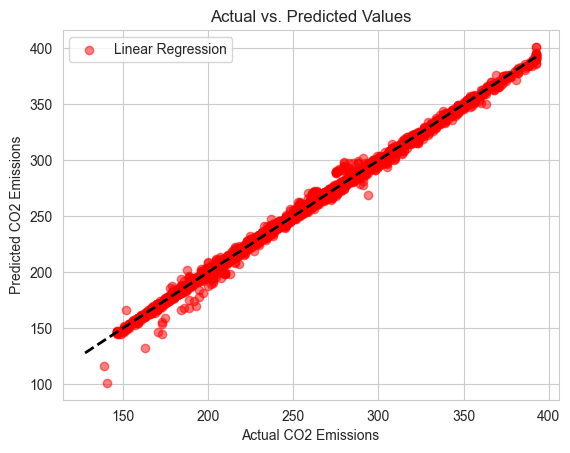

In [87]:
plt.scatter(y_test, lr_pred, color='red', alpha=0.5, label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### GradientBoostingRegressor

In [79]:

gbr=GradientBoostingRegressor().fit(X_train, y_train)
y_pred=gbr.predict(X_test)
xtrain=gbr.predict(X_train)
print('GradienBoost Regression')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, y_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, y_pred))

GradienBoost Regression
MSE_train 19.524154939977503
MSE_test: 25.191579484683043
MAE_train 2.995057013279236
MAE: 3.290238910947657
R-squared_train 0.9931230639326113
R-squared: 0.9910828149321548


### Gradient Boosting Regressor has relatively high errors and lower R-squared values compared to other models, indicating it might not be the best choice for this dataset.

In [ ]:
#### Graphical represenation of GradientBoostingRegressor

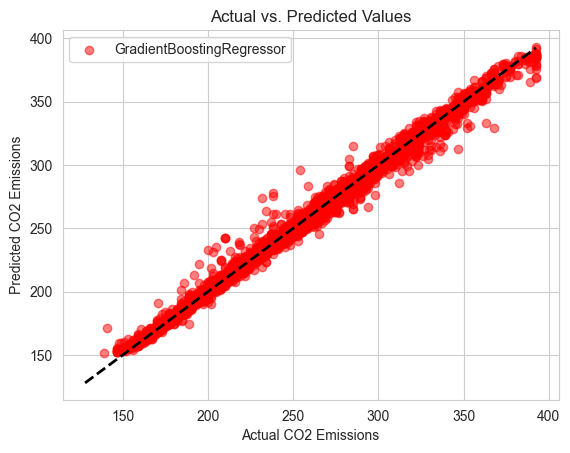

In [90]:
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='GradientBoostingRegressor')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### Support Vector Regression

In [80]:

svr_model=SVR()
svr_model.fit(X_train, y_train)

SVR(C=3)

In [145]:
svr = SVR()
svr.fit(X_train, y_train)
xtrain=svr.predict(X_train)
svr_pred = svr.predict(X_test)
print('Support Vector Regression:')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, svr_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, svr_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, svr_pred))

Support Vector Regression:
MSE_train 56.100515181502175
MSE_test: 57.37691404816715
MAE_train 3.1586794396879703
MAE: 3.316274482281617
R-squared_train 0.9802398793987852
R-squared: 0.9796900165985845


### SVR shows the highest MSE and MAE among all models, indicating the poorest performance. Its R-squared values are also the lowest, suggesting it does not fit the data well.

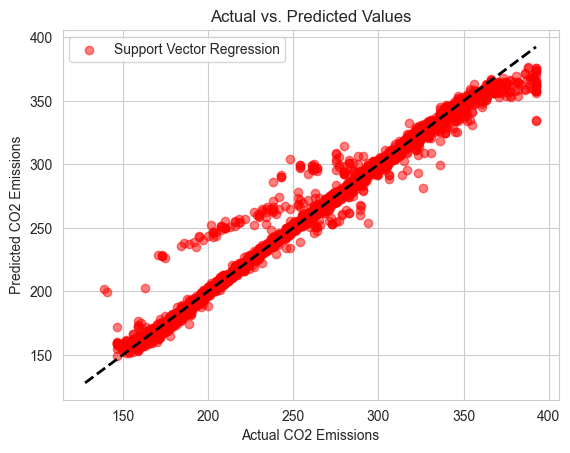

In [146]:
plt.scatter(y_test, svr_pred, color='red', alpha=0.5, label='Support Vector Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### DecisionTreeRegressor

In [83]:

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
xtrain=dt.predict(X_train)
dt_pred = dt.predict(X_test)
print('Decision Tree Regression:')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, dt_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, dt_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, dt_pred))

Decision Tree Regression:
MSE_train 0.3126091617933723
MSE_test: 20.572075018189377
MAE_train 0.10242884990253409
MAE: 1.8292017461802308
R-squared_train 0.9998898905880259
R-squared: 0.9927180032407922


### Decision Tree Regressor shows very low training errors but significantly higher test errors, indicating potential overfitting. Its test R-squared value is slightly lower than that of Random Forest.

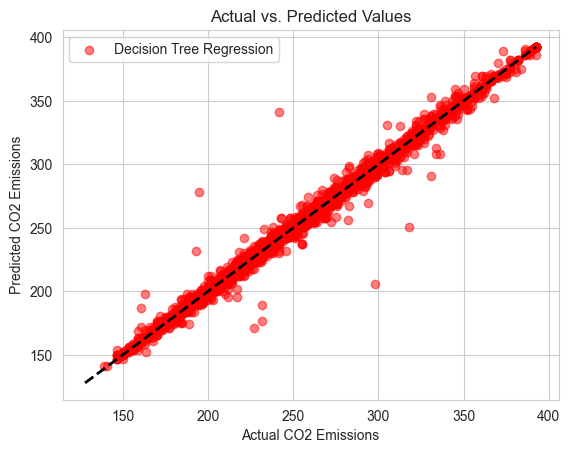

In [92]:
plt.scatter(y_test, dt_pred, color='red', alpha=0.5, label='Decision Tree Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### RandomForestRegressor

In [147]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
xtrain=rf.predict(X_train)
print('Random Forest Regression:')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, rf_pred))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, rf_pred))

Random Forest Regression:
MSE_train 2.2222616704418905
MSE_test: 12.924009853582577
MAE_train 0.6696263299030403
MAE: 1.6402849019224714
R-squared_train 0.9992172592627123
R-squared: 0.995425225807968


### Random Forest Regressor has the best performance overall, with low errors and high R-squared values for both training and test sets. This indicates a good balance between bias and variance, making it the most robust model among the ones compared.

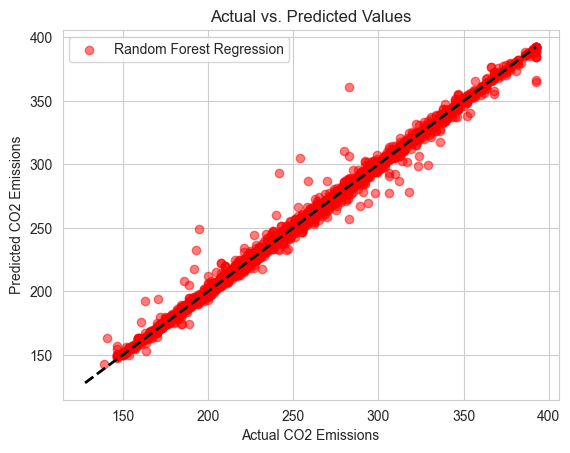

In [93]:
plt.scatter(y_test, rf_pred, color='red', alpha=0.5, label='Random Forest Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
### Grahical representaion of each 5 reggression models

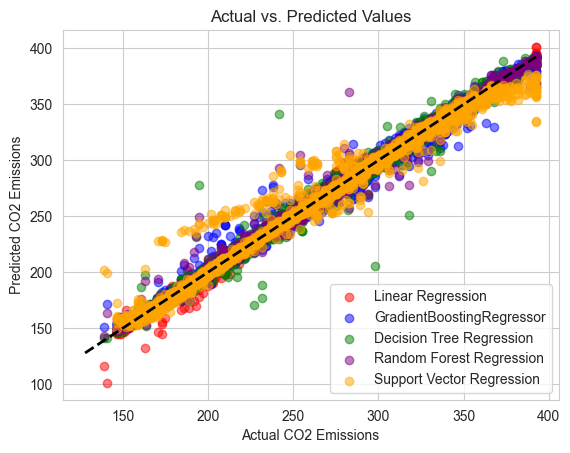

In [171]:
plt.scatter(y_test, lr_pred, color='red', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='GradientBoostingRegressor')
plt.scatter(y_test, dt_pred, color='green', alpha=0.5, label='Decision Tree Regression')
plt.scatter(y_test, rf_pred, color='purple', alpha=0.5, label='Random Forest Regression')
plt.scatter(y_test, svr_pred, color='orange', alpha=0.5, label='Support Vector Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
## The resulting plot shows the actual vs. predicted CO2 emissions values for each regression model,
## allowing for a visual comparison of their performance.

In [190]:

model_name = ['Linear Regression', 'GradientBoosting Regressor', 'SVR', 'DecisionTree Regressor', 'RandomForest Regressor']
MSE_train = [7.172600820425837, 19.524154939977503, 56.100515181502175, 0.3126091617933723,  2.2222616704418905]
MSE_test = [8.155877087834908,  25.191579484683043, 57.37691404816715, 20.572075018189377,  12.924009853582577]
MAE_train = [1.6327678456428807,2.995057013279236, 3.1586794396879703,0.10242884990253409, 0.6696263299030403]
MAE_test =[1.7022604264100072, 3.290238910947657, 3.316274482281617,1.8292017461802308,1.6402849019224714]
R_squared_train=[0.9974736157631094,0.9931230639326113,0.9802398793987852,0.9998898905880259, 0.9992172592627123]
R_squared_test=[0.9971130247935807,0.9910828149321548,0.9796900165985845,0.9927180032407922,0.995425225807968]

# Create a dictionary
eval_measures = {
    'Model': model_name,
    'MSE_train' : MSE_train,
    'MSE_test' : MSE_test,
    'MAE_train' : MAE_train,
    'MAE_test' :MAE_test,
    'R-squared_train':R_squared_train,
    'R-squared_test':R_squared_test
}

# Convert to DataFrame
df = pd.DataFrame(eval_measures)
df


Model  MSE_train   MSE_test  MAE_train  MAE_test  \
0           Linear Regression   7.172601   8.155877   1.632768  1.702260   
1  GradientBoosting Regressor  19.524155  25.191579   2.995057  3.290239   
2                         SVR  56.100515  57.376914   3.158679  3.316274   
3      DecisionTree Regressor   0.312609  20.572075   0.102429  1.829202   
4      RandomForest Regressor   2.222262  12.924010   0.669626  1.640285   

   R-squared_train  R-squared_test  
0         0.997474        0.997113  
1         0.993123        0.991083  
2         0.980240        0.979690  
3         0.999890        0.992718  
4         0.999217        0.995425

##  Hyperparameter Tunning for each models

### Hyperparameter Tunning for Decision Tree model

In [95]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None,'sqrt', 'log2'],
     'max_leaf_nodes': [None, 10, 20, 30]
}

# Define the Decision Tree model
dt1 = DecisionTreeRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(dt1, param_grid)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.9875305689546607


In [ ]:
## model training after giving best parameters to the model

In [152]:

dt2 = DecisionTreeRegressor(max_depth= 15, max_features=None, min_samples_leaf= 1, min_samples_split= 10,max_leaf_nodes= None,random_state=42)
dt2.fit(X_train, y_train)
dt_pred1 = dt2.predict(X_test)
print('DecisionTreeRegressor:')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, dt_pred1))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, dt_pred1))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, dt_pred1))

DecisionTreeRegressor:
MSE_train 2.2222616704418905
MSE_test: 25.535736237421844
MAE_train 0.6696263299030403
MAE: 2.254883009347586
R-squared_train 0.9992172592627123
R-squared: 0.990960992104079


### Decision Tree Regressor shows very low training errors but much higher test errors, indicating overfitting.

### Hyperparameter Tunning for Random Forest model

In [ ]:

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2']
}


In [105]:

# Define the Random Forest model
rf1 = RandomForestRegressor()
# Perform GridSearchCV
grid_search = GridSearchCV(rf1,param_grid,verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.948 total time=   9.7s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.958 total time=   9.2s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.952 total time=   9.4s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.960 total time=   9.4s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.955 total time=   9.3s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.966 total time=  47.1s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, s

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             verbose=3)

In [106]:

print("Best parameters:",grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9685098425070798


In [153]:

rf2 = RandomForestRegressor(max_depth=None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators=100 ,random_state=42)
rf2.fit(X_train, y_train)
rf_pred1 = rf2.predict(X_test)
print('Random Forest Regression:')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, rf_pred1))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, rf_pred1))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, rf_pred1))

Random Forest Regression:
MSE_train 2.2222616704418905
MSE_test: 67.68715453161462
MAE_train 0.6696263299030403
MAE: 5.0572376337543545
R-squared_train 0.9992172592627123
R-squared: 0.9760404509752463


### Random Forest Regressor has very low training errors but extremely high test errors, indicating severe overfitting and poor generalization to the test data.

### Hyperparameter Tunning for LinearRegression

In [141]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1,-1]
    
}

In [142]:

lr1 = LinearRegression()
# Perform GridSearchCV
grid_search = GridSearchCV(lr1,param_grid,verbose=3)
grid_search.fit(X_train, y_train)
print("Grid Search Results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=1;, score=0.997 total time=   0.9s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=1;, score=0.997 total time=   0.9s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=1;, score=0.997 total time=   1.1s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=1;, score=0.997 total time=   1.2s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=1;, score=0.997 total time=   1.1s
[CV 1/5] END copy_X=True, fit_intercept=True, n_jobs=-1;, score=0.997 total time=   1.1s
[CV 2/5] END copy_X=True, fit_intercept=True, n_jobs=-1;, score=0.997 total time=   0.7s
[CV 3/5] END copy_X=True, fit_intercept=True, n_jobs=-1;, score=0.997 total time=   0.8s
[CV 4/5] END copy_X=True, fit_intercept=True, n_jobs=-1;, score=0.997 total time=   0.8s
[CV 5/5] END copy_X=True, fit_intercept=True, n_jobs=-1;, score=0.997 total time=   0.8s
[CV 1/5] END copy_X=True, fit_intercept=False, n_jobs=1

In [144]:

lr1 = LinearRegression(copy_X= True, fit_intercept= True,n_jobs= 1)
lr1.fit(X_train, y_train)
xtrain=lr1.predict(X_train)
lr_pred1 = lr1.predict(X_test)
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, lr_pred1))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, lr_pred1))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, lr_pred1))


MSE_train 7.172600820425837
MSE_test: 8.155877087834908
MAE_train 1.6327678456428807
MAE: 1.7022604264100072
R-squared_train 0.9974736157631094
R-squared: 0.9971130247935807


### Linear Regression shows high R-squared values and relatively low errors, making it a solid choice for this dataset.

### Hyperparameter Tunning for Support Vector Regression

In [118]:
param_grid = {
    'C': [0.1,1,3],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}


In [119]:

svr1 = SVR()
# Perform GridSearchCV
grid_search = GridSearchCV(svr1,param_grid,verbose=3)
grid_search.fit(X_train, y_train)
print("Grid Search Results:")
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.972 total time=  59.7s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.964 total time=  58.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.973 total time=  58.4s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.966 total time=  58.1s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.967 total time=  56.4s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.813 total time= 1.0min
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.802 total time= 1.0min
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.803 total time=  59.1s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.806 total time= 1.0min
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.813 total time= 1.0min
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.888 total time= 1.1min
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;

In [121]:
svr1 = SVR(kernel='linear',C=3,gamma='scale')
svr1.fit(X_train,y_train)
xtrain=svr1.predict(X_train)
svr_pred1 = svr1.predict(X_test)
print('Support Vector Regression:')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, svr_pred1))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, svr_pred1))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, svr_pred1))

Support Vector Regression:
MSE_train 8.57126663554463
MSE_test: 9.309390244544364
MAE_train 1.47082720371046
MAE: 1.5132612681420365
R-squared_train 0.9969809677883426
R-squared: 0.9967047101699253


### SVR has slightly higher errors than Linear Regression but maintains high R-squared values, indicating a good fit.

### Hyperparameter Tunning for GradientBoostingRegressor

In [126]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate
    'n_estimators': [50,100,150],  # Number of trees
    'max_depth': [3, 5, 10],  # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples for split
    'min_samples_leaf': [1, 5, 10],  # Minimum samples for leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Maximum features
}

In [127]:
gb1 = GradientBoostingRegressor()
grid_search = GridSearchCV(gb1,param_grid,cv=5,verbose=3)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END lear

In [133]:

gbr1=GradientBoostingRegressor(learning_rate= 0.1,max_depth= 10,max_features='sqrt',min_samples_leaf=10,min_samples_split= 10,n_estimators=150)
gbr1.fit(X_train, y_train)
y_pred1=gbr1.predict(X_test)
xtrain=gbr1.predict(X_train)
print('GradienBoost Regression')
print('MSE_train',mean_squared_error(y_train,xtrain))
print('MSE_test:', mean_squared_error(y_test, y_pred1))
print('MAE_train',mean_absolute_error(y_train,xtrain))
print('MAE:', mean_absolute_error(y_test, y_pred1))
print('R-squared_train',r2_score(y_train,xtrain))
print('R-squared:', r2_score(y_test, y_pred1))

GradienBoost Regression
MSE_train 1.6035034418995782
MSE_test: 41.69528026083925
MAE_train 0.8775822119508775
MAE: 3.6289169230477394
R-squared_train 0.9994352026662521
R-squared: 0.9852409202540222


 ### Gradient Boosting Regressor has the lowest training errors but very high test errors, suggesting significant overfitting.

### Evaluation meassures of reggression models after hyperparameter tunning

In [189]:

model_name = ['Linear Regression', 'GradientBoosting Regressor', 'SVR', 'DecisionTree Regressor', 'RandomForest Regressor']
MSE_train = [ 7.172600820425837,1.6035034418995782,8.57126663554463, 2.2222616704418905, 2.2222616704418905]
MSE_test = [8.155877087834908, 41.69528026083925,9.309390244544364, 25.535736237421844,  67.68715453161462]
MAE_train = [1.6327678456428807,0.8775822119508775,1.47082720371046,0.6696263299030403,0.6696263299030403]
MAE_test =[ 1.7022604264100072, 3.6289169230477394,1.5132612681420365, 2.254883009347586,5.0572376337543545]
R_squared_train=[0.9974736157631094,0.9994352026662521,0.9969809677883426, 0.9992172592627123,0.9992172592627123]
R_squared_test=[0.9971130247935807, 0.9852409202540222, 0.9967047101699253,0.990960992104079, 0.9760404509752463]

# Create a dictionary
eval_measures = {
    'Model': model_name,
    'MSE_train' : MSE_train,
    'MSE_test' : MSE_test,
    'MAE_train' : MAE_train,
    'MAE_test' :MAE_test,
    'R-squared_train':R_squared_train,
    'R-squared_test':R_squared_test
}

# Convert to DataFrame
df = pd.DataFrame(eval_measures)
df


Model  MSE_train   MSE_test  MAE_train  MAE_test  \
0           Linear Regression   7.172601   8.155877   1.632768  1.702260   
1  GradientBoosting Regressor   1.603503  41.695280   0.877582  3.628917   
2                         SVR   8.571267   9.309390   1.470827  1.513261   
3      DecisionTree Regressor   2.222262  25.535736   0.669626  2.254883   
4      RandomForest Regressor   2.222262  67.687155   0.669626  5.057238   

   R-squared_train  R-squared_test  
0         0.997474        0.997113  
1         0.999435        0.985241  
2         0.996981        0.996705  
3         0.999217        0.990961  
4         0.999217        0.976040

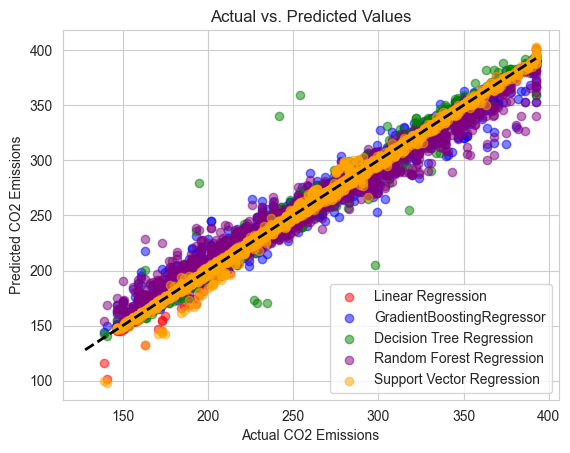

In [134]:
plt.scatter(y_test, lr_pred1, color='red', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred1, color='blue', alpha=0.5, label='GradientBoostingRegressor')
plt.scatter(y_test, dt_pred1, color='green', alpha=0.5, label='Decision Tree Regression')
plt.scatter(y_test, rf_pred1, color='purple', alpha=0.5, label='Random Forest Regression')
plt.scatter(y_test, svr_pred1, color='orange', alpha=0.5, label='Support Vector Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
## The resulting plot shows the actual vs. predicted CO2 emissions values for each regression model,
## allowing for a visual comparison of their performance. After doing hyperparameter tunning

## Conclusion

 * ### After analysing the above data , we can come under following conclusion:

1.  As the first step to Data processsing data cleaning is done.Where methods of :-
2.  removing duplicate data
3.  removing null col
4.  finding errors
5.  converting to lowercase is done
6.  ### Visualization
7.  And in visualising the datas, we can is that throught out years the emission co2 is increasig
8.  And the use of Natural gas 'N' as decreased and use of ethanol,diesel,and petrol as increased
9.  when fuel consumption and  emission of co2 is increasing the engine size and no. of clylinder is also increasing 
10.  Top Car Company Contribution in the car market is chevrolet
11.  Top saled car class is compact model
12.  The most number of unique values  belongs to MODEL feature.
13. ### Feature Engineering
14.  Most of the values are contiues value so one hot encoding is done for categircal features
15.  Then data are splitted for Training and testing
16.  Other than the encoded features and the target feature the rest are scaled to same units using standard scaleing
17.  After tht feature extration is done for dimensionality reduction using PCA
18.  Modeling is done
19.  ###  Modeling
20. The Random Forest Regressor is the best-performing model in terms of error metrics (MSE, MAE) and goodness-of-fit (R-squared).
21.   The Decision Tree Regressor also performs well but shows signs of overfitting.
22.  Linear Regression has a good fit but higher errors compared to Random Forest.
23.  Gradient Boosting Regressor and SVR have the highest errors and lower R-squared values, indicating they are less suitable for this dataset.
24. ### After Model Tunning
25.  Linear Regression and SVR are the most balanced models, with high R-squared values and relatively low errors for both training and test sets.
26.  Gradient Boosting Regressor shows significant overfitting with the lowest training errors but very high test errors.
27.  Decision Tree Regressor and Random Forest Regressor both exhibit overfitting, with Random Forest showing the worst test performance among all      models   .

### Suggestions...

1. Vehicle weight and aerodynamics: The weight and aerodynamics of the vehicle also impact fuel consumption and emissions. A larger engine in a lighter vehicle or with improved aerodynamics might not necessarily lead to increased emissions and fuel consumption.
2. Driving habits and conditions: Aggressive driving, frequent acceleration, and driving in hilly or city traffic can increase emissions and fuel consumption, regardless of engine size.
3. Engine efficiency: Modern engines are designed to be more efficient, which can offset the increased emissions and fuel consumption associated with larger engines.
4. Engine technology: Advances in engine technology, such as turbocharging, direct injection, and hybridization, can improve fuel efficiency and reduce emissions of co2.